# Load packages 

In [3]:
# Installs
# !pip install geopandas
# !pip install rasterstats
# !pip install pyarrow

In [2]:
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

# from geofeather.pygeos import to_geofeather, from_geofeather

import pandas as pd
import geopandas as gpd

#import pygeos
from rasterstats import zonal_stats
from scipy.stats import spearmanr
import shapely

from shapely.geometry import mapping, shape
import shapely.wkb

# Load data

## CISI index

In [5]:
# Set paths
cisi_index_path = r"C:\Users\Gebruiker\Desktop\Thesis\FutureCISI-main\FutureCISI-main\data\010_degree\CISI_europe.feather"
# cisi_index_path = "Users\Gebruiker\Desktop\Thesis\FutureCISI-main\FutureCISI-main\data\CISI_europe.feather"
cisi_index_clip_path = 'data/CISI_exposure_Global.feather'

cisi_index_path
# Read data CISI index
cisi_index = pd.read_feather(cisi_index_path)
cisi_index_clip = pd.read_feather(cisi_index_path)
cisi_index_clip.head(3)

,CISI,Subscore_energy,Subscore_transportation,Subscore_water,Subscore_waste,Subscore_telecommunication,Subscore_healthcare,Subscore_education,geometry
0,0.015926,0.000000,0.014159,0.000000,0.000106,0.00000,0.000603,0.001058,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
1,0.000216,0.000000,0.000216,0.000000,0.000000,0.00000,0.000000,0.000000,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
2,0.039630,0.002892,0.025552,0.000002,0.000012,0.00131,0.004327,0.005535,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...


## Pop v2 2010 & 2100

In [6]:
# Set paths Pop v2 dataset

#2010
world_pop_2010_SSP2_merkens = "data/output/resample/clipped_pop_2010.tif"
world_pop_2010_SSP1 = "data/population_v2/SSP1_2010_EU_UK.tif"
world_pop_2010_SSP2 = "data/population_v2/SSP2_2010_EU_UK.tif"
world_pop_2010_SSP3 = "data/population_v2/SSP3_2010_EU_UK.tif"
world_pop_2010_SSP4 = "data/population_v2/SSP4_2010_EU_UK.tif"
world_pop_2010_SSP5 = "data/population_v2/SSP5_2010_EU_UK.tif"

#2100
world_pop_2100_SSP1 = "data/population_v2/SSP1_2100_EU_UK.tif"
world_pop_2100_SSP2 = "data/population_v2/SSP2_2100_EU_UK.tif"
world_pop_2100_SSP3 = "data/population_v2/SSP3_2100_EU_UK.tif"
world_pop_2100_SSP4 = "data/population_v2/SSP4_2100_EU_UK.tif"
world_pop_2100_SSP5 = "data/population_v2/SSP5_2100_EU_UK.tif"

print(world_pop_2010_SSP1)


data/population_v2/SSP1_2010_EU_UK.tif


## Pop 2030 2050

In [7]:
# Pop 2030
world_pop_2030_SSP1 = "data/population_v2/SSP1_2030_EU_UK.tif"
world_pop_2030_SSP2 = "data/population_v2/SSP2_2030_EU_UK.tif"
world_pop_2030_SSP3 = "data/population_v2/SSP3_2030_EU_UK.tif"
world_pop_2030_SSP4 = "data/population_v2/SSP4_2030_EU_UK.tif"
world_pop_2030_SSP5 = "data/population_v2/SSP5_2030_EU_UK.tif"
# add to list
world_pop_2030 = [world_pop_2030_SSP1, world_pop_2030_SSP2, world_pop_2030_SSP3, world_pop_2030_SSP4, world_pop_2030_SSP5]

# Pop 2050
world_pop_2050_SSP1 = "data/population_v2/SSP1_2050_EU_UK.tif"
world_pop_2050_SSP2 = "data/population_v2/SSP2_2050_EU_UK.tif"
world_pop_2050_SSP3 = "data/population_v2/SSP3_2050_EU_UK.tif"
world_pop_2050_SSP4 = "data/population_v2/SSP4_2050_EU_UK.tif"
world_pop_2050_SSP5 = "data/population_v2/SSP5_2050_EU_UK.tif"
# add to list
world_pop_2050 = [world_pop_2050_SSP1, world_pop_2050_SSP2, world_pop_2050_SSP3, world_pop_2050_SSP4, world_pop_2050_SSP5]

## CISI abs values

In [ ]:
# Read data CISI absolute value

# glob list files in folder ending with .feather
cisi_absolute_value_folder = "data/output/corr_v2/resample"
cisi_absolute_value_file_paths = [os.path.join(cisi_absolute_value_folder, f) for f in os.listdir(cisi_absolute_value_folder) if f.endswith('.feather')]
cisi_absolute_value_file_names = [os.path.basename(f) for f in cisi_absolute_value_file_paths]

for file_path, file_name in zip(cisi_absolute_value_file_paths, cisi_absolute_value_file_names):
    if 'education' in file_name:
        cisi_abs_val_education = pd.read_feather(file_path)
        print("Education DataFrame:")
        print(cisi_abs_val_education.head(2))
    elif 'healthcare' in file_name:
        cisi_abs_val_health = pd.read_feather(file_path)
        print("Healthcare DataFrame:")
        print(cisi_abs_val_health.head(2))
    elif 'energy' in file_name:
         = pd.read_feathcisi_abs_val_energyer(file_path)
        print("Energy DataFrame:")
        print(cisi_abs_val_energy.head(2))
    elif 'water' in file_name:
        cisi_abs_val_water = pd.read_feather(file_path)
        print("Water DataFrame:")
        print(cisi_abs_val_water.head(2))
    elif 'waste' in file_name:
        cisi_abs_val_waste = pd.read_feather(file_path)
        print("Waste DataFrame:")
        print(cisi_abs_val_waste.head(2))
    elif 'transport' in file_name:
        cisi_abs_val_transport = pd.read_feather(file_path)
        print("Transport DataFrame:")
        print(cisi_abs_val_transport.head(2))
    elif 'telecommunication' in file_name:
        cisi_abs_val_telecom = pd.read_feather(file_path)
        print("Telecommunication DataFrame:")
        print(cisi_abs_val_telecom.head(2))

# Aggregate Population data per grid cell

In [9]:
def value_zonal_stat(x,world_grid):
    try:
        return zonal_stats(x,world_grid,stats="sum")
    except:
        return [{'sum': 0}]
        


In [10]:
# # function to check if crs of .tif files same as cisi_index_clip and convert crs if not
# import rasterio

# def check_crs_and_convert(tif_file, cisi_index_clip):
# # Path to your TIFF file
#     with rasterio.open(tif_file) as pop:
#         if pop.crs != cisi_index_clip.crs:
#             print(f"CRS of {tif_file} is not the same as cisi_index_clip. Converting CRS...")
#             pop = pop.to_crs(cisi_index_clip.crs)
#             transform, width, height = calculate_default_transform(
#                 src.crs, new_crs, src.width, src.height, *src.bounds)
            
#             # Define the metadata for the new file
#             kwargs = src.meta.copy()
#             kwargs.update({
#                 'crs': new_crs,
#                 'transform': transform,
#                 'width': width,
#                 'height': height


#     return pop


## CISI index

In [11]:
# Create shapely geometries from WKB [store data] for operation

# cisi_index_clip.geometry = shapely.from_wkb(cisi_index_clip.geometry)
# cisi_index_clip = gpd.GeoDataFrame(cisi_index_clip.copy())
# cisi_index_clip.set_crs("EPSG:4326" , inplace=True)

# Ensure that the geometry column is correctly converted from WKB
cisi_index_clip['geometry'] = cisi_index_clip['geometry'].apply(lambda x: shapely.from_wkb(x) if x else None)
# Create a GeoDataFrame
cisi_index_clip = gpd.GeoDataFrame(cisi_index_clip.copy(), geometry='geometry')
# Set the CRS
cisi_index_clip.set_crs("EPSG:4326", inplace=True)

,CISI,Subscore_energy,Subscore_transportation,Subscore_water,Subscore_waste,Subscore_telecommunication,Subscore_healthcare,Subscore_education,geometry
0,0.015926,0.000000,0.014159,0.000000,0.000106,0.000000,0.000603,0.001058,"POLYGON ((-16.9 32.65833, -16.8 32.65833, -16...."
1,0.000216,0.000000,0.000216,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((-17.1 32.65833, -17 32.65833, -17 32..."
2,0.039630,0.002892,0.025552,0.000002,0.000012,0.001310,0.004327,0.005535,"POLYGON ((-17 32.65833, -16.9 32.65833, -16.9 ..."
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((-16.7 32.75833, -16.6 32.75833, -16...."
4,0.042959,0.000517,0.025099,0.000006,0.000019,0.013901,0.002127,0.001290,"POLYGON ((-16.8 32.75833, -16.7 32.75833, -16...."
...,...,...,...,...,...,...,...,...,...
380942,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((20.7 80.75833, 20.8 80.75833, 20.8 8..."
380943,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((20.8 80.75833, 20.9 80.75833, 20.9 8..."
380944,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((20.9 80.75833, 21 80.75833, 21 80.65..."
380945,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((21 80.75833, 21.1 80.75833, 21.1 80...."


## World pop 2030 & 2050

In [ ]:
#calculate total_pop_2010 per CISI grid cell
tqdm.pandas(desc='pop merkens')
cisi_index_clip['total_pop_2010_SSP2_merkens'] = cisi_index_clip.geometry.progress_apply(lambda x: value_zonal_stat(x,world_pop_2010_SSP2_merkens))
cisi_index_clip['total_pop_2010_SSP2_merkens'] = cisi_index_clip['total_pop_2010_SSP2_merkens'].apply(lambda x: x[0]['sum'])
cisi_index_clip.head(3)

#SSP1 calculate total_pop_2010 per CISI grid cell
tqdm.pandas(desc='pop 2010 SSP1')
cisi_index_clip['total_pop_2010_SSP1'] = cisi_index_clip.geometry.progress_apply(lambda x: value_zonal_stat(x,world_pop_2010_SSP1))
cisi_index_clip['total_pop_2010_SSP1'] = cisi_index_clip['total_pop_2010_SSP1'].apply(lambda x: x[0]['sum'])
cisi_index_clip.head(3)

pop merkens:   2%|▏         | 8246/380947 [00:06<04:25, 1404.23it/s]

KeyboardInterrupt: 

Exception ignored in: 'rasterio._env.log_error'
Traceback (most recent call last):
  File "c:\Users\Gebruiker\AppData\Local\Programs\Python\Python311\Lib\logging\__init__.py", line 1479, in info
    def info(self, msg, *args, **kwargs):

KeyboardInterrupt: 
pop merkens:   7%|▋         | 25080/380947 [00:19<04:48, 1233.32it/s]

In [ ]:
tqdm.pandas()

def calculate_total_population_per_grid_cell(geo_df, pop_dataset_year, prefix):
    """
    Calculate total population per grid cell for each population dataset in the list.

    Parameters:
    geo_df (GeoDataFrame): The GeoDataFrame containing the geometries.
    pop_datasets (list): A list of population datasets.
    prefix (str): The prefix for the new columns.

    Returns:
    GeoDataFrame: The updated GeoDataFrame with new columns for each population dataset.
    """
    for i, pop_dataset_year in enumerate(pop_dataset_year):
        j = i + 1
        column_name = f'{prefix}_SSP{j}'
        geo_df[column_name] = geo_df.geometry.progress_apply(lambda x: value_zonal_stat(x, pop_dataset_year))
        geo_df[column_name] = geo_df[column_name].apply(lambda x: x[0]['sum'] if x is not None else 0)
    return geo_df 

# Calculate total population per grid cell for each population dataset in the list
cisi_index_clip = calculate_total_population_per_grid_cell(cisi_index_clip, world_pop_2030, 'total_pop_2030')
cisi_index_clip = calculate_total_population_per_grid_cell(cisi_index_clip, world_pop_2050, 'total_pop_2050')

 30%|███       | 115934/380947 [13:43<22:34, 195.62it/s] 

In [ ]:
# CISI index pop. 2010

# #SSP2 calculate total_pop_2010 per CISI grid cell
# tqdm.pandas(desc='pop')
# cisi_index_clip['total_pop_2010_SSP2'] = cisi_index_clip.geometry.progress_apply(lambda x: value_zonal_stat(x,world_pop_2010_SSP2))
# cisi_index_clip['total_pop_2010_SSP2'] = cisi_index_clip['total_pop_2010_SSP2'].apply(lambda x: x[0]['sum'])
# cisi_index_clip.head(3)

# #SSP3 calculate total_pop_2010 per CISI grid cell
# tqdm.pandas(desc='pop')
# cisi_index_clip['total_pop_2010_SSP3'] = cisi_index_clip.geometry.progress_apply(lambda x: value_zonal_stat(x,world_pop_2010_SSP3))
# cisi_index_clip['total_pop_2010_SSP3'] = cisi_index_clip['total_pop_2010_SSP3'].apply(lambda x: x[0]['sum'])
# cisi_index_clip.head(3)

# #SSP4 calculate total_pop_2010 per CISI grid cell
# tqdm.pandas(desc='pop')
# cisi_index_clip['total_pop_2010_SSP4'] = cisi_index_clip.geometry.progress_apply(lambda x: value_zonal_stat(x,world_pop_2010_SSP4))
# cisi_index_clip['total_pop_2010_SSP4'] = cisi_index_clip['total_pop_2010_SSP4'].apply(lambda x: x[0]['sum'])
# cisi_index_clip.head(3)

# #SSP5 calculate total_pop_2010 per CISI grid cell
# tqdm.pandas(desc='pop')
# cisi_index_clip['total_pop_2010_SSP5'] = cisi_index_clip.geometry.progress_apply(lambda x: value_zonal_stat(x,world_pop_2010_SSP5))
# cisi_index_clip['total_pop_2010_SSP5'] = cisi_index_clip['total_pop_2010_SSP5'].apply(lambda x: x[0]['sum'])
# cisi_index_clip.head(3)


# Pop 2100
#SSP1 calculate total_pop_2100 per CISI grid cell
tqdm.pandas(desc='pop 2100 SSP1')
cisi_index_clip['total_pop_2100_SSP1'] = cisi_index_clip.geometry.progress_apply(lambda x: value_zonal_stat(x,world_pop_2100_SSP1))
cisi_index_clip['total_pop_2100_SSP1'] = cisi_index_clip['total_pop_2100_SSP1'].apply(lambda x: x[0]['sum'])
cisi_index_clip.head(3)

#SSP2 calculate total_pop_2100 per CISI grid cell
tqdm.pandas(desc='pop 2100 SSP2')
cisi_index_clip['total_pop_2100_SSP2'] = cisi_index_clip.geometry.progress_apply(lambda x: value_zonal_stat(x,world_pop_2100_SSP2))
cisi_index_clip['total_pop_2100_SSP2'] = cisi_index_clip['total_pop_2100_SSP2'].apply(lambda x: x[0]['sum'])
cisi_index_clip.head(3)

#SSP3 calculate total_pop_2100 per CISI grid cell
tqdm.pandas(desc='pop 2100 SSP3')
cisi_index_clip['total_pop_2100_SSP3'] = cisi_index_clip.geometry.progress_apply(lambda x: value_zonal_stat(x,world_pop_2100_SSP3))
cisi_index_clip['total_pop_2100_SSP3'] = cisi_index_clip['total_pop_2100_SSP3'].apply(lambda x: x[0]['sum'])
cisi_index_clip.head(3)

#SSP4 calculate total_pop_2100 per CISI grid cell
tqdm.pandas(desc='pop 2100 SSP4')
cisi_index_clip['total_pop_2100_SSP4'] = cisi_index_clip.geometry.progress_apply(lambda x: value_zonal_stat(x,world_pop_2100_SSP4))
cisi_index_clip['total_pop_2100_SSP4'] = cisi_index_clip['total_pop_2100_SSP4'].apply(lambda x: x[0]['sum'])
cisi_index_clip.head(3)

#SSP5 calculate total_pop_2100 per CISI grid cell
tqdm.pandas(desc='pop 2100 SSP5')
cisi_index_clip['total_pop_2100_SSP5'] = cisi_index_clip.geometry.progress_apply(lambda x: value_zonal_stat(x,world_pop_2100_SSP5))
cisi_index_clip['total_pop_2100_SSP5'] = cisi_index_clip['total_pop_2100_SSP5'].apply(lambda x: x[0]['sum'])
cisi_index_clip.head(3)

NameError: name 'cisi_index_clip' is not defined

In [ ]:
# remove NaN values
cisi_index_clip = cisi_index_clip.dropna(subset=['total_pop_2010_SSP1'])

NameError: name 'cisi_index_clip' is not defined

## CISI absolute value

In [3]:
cisi_abs_val_energy.geometry = shapely.from_wkb(cisi_abs_val_energy.geometry)
cisi_abs_val_energy = gpd.GeoDataFrame(cisi_abs_val_energy.copy())
cisi_abs_val_energy.set_crs("EPSG:4326")

NameError: name 'cisi_abs_val_energy' is not defined

In [ ]:
#SSP1 calculate total_pop_2010 per CISI grid cell
tqdm.pandas(desc='pop')
cisi_abs_val_energy['total_pop_2010_SSP1'] = cisi_abs_val_energy.geometry.progress_apply(lambda x: value_zonal_stat(x,world_pop_2010_SSP1))
cisi_abs_val_energy['total_pop_2010_SSP1'] = cisi_abs_val_energy['total_pop_2010_SSP1'].apply(lambda x: x[0]['sum'])
cisi_abs_val_energy.head(3)

NameError: name 'cisi_abs_val_energy' is not defined

## Output folder + save new dataframes with geometries in wbk format

In [ ]:
# # Make output folder if it does not exist


# output_folder_corr = "data/output/corr_v2"

# if not os.path.exists(output_folder_corr):
#     os.makedirs(output_folder_corr)

In [ ]:
# # CISI index

# cisi_index_pop_path = os.path.join(output_folder_corr, 'CISI_exposure_clip_with_pop_v2.feather')
# # Copy the GeoDataFrame
# cisi_index_pop = pd.DataFrame(cisi_index_clip.copy())
# # Convert Shapely geometry objects to WKB
# cisi_index_pop.geometry = cisi_index_pop.geometry.apply(shapely.wkb.dumps)
# # Save to Feather format
# cisi_index_pop.to_feather(cisi_index_pop_path)

NameError: name 'cisi_index_clip' is not defined

In [ ]:
# # Load data CISI index with aggregated pop
# cisi_index_pop = pd.read_feather(cisi_index_pop_path)
# cisi_index_pop.geometry = shapely.from_wkb(cisi_index_clip.geometry)
# cisi_index_pop = gpd.GeoDataFrame(cisi_index_clip.copy())
# cisi_index_pop.set_crs("EPSG:4326" , inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: 'data/output/corr_v2\\CISI_exposure_clip_with_pop_v2.feather'

In [ ]:
# Create output folder
output_folder_corr = "data/output/corr_v2"
os.makedirs(output_folder_corr, exist_ok=True)

# Save to feather
cisi_index_pop_path = os.path.join(output_folder_corr, 'CISI_exposure_clip_with_pop_v2.feather')
cisi_index_pop = cisi_index_clip.copy()
cisi_index_pop['geometry'] = cisi_index_pop.geometry.apply(shapely.wkb.dumps)
pd.DataFrame(cisi_index_pop).to_feather(cisi_index_pop_path)

# Load and restore GeoDataFrame
cisi_index_pop = pd.read_feather(cisi_index_pop_path)
cisi_index_pop['geometry'] = cisi_index_pop.geometry.apply(shapely.wkb.loads)
cisi_index_pop = gpd.GeoDataFrame(cisi_index_pop, geometry='geometry')

# Set CRS if needed
if cisi_index_pop.crs is None:
    cisi_index_pop.set_crs("EPSG:4326", inplace=True)

In [ ]:
# CISI absolute value

cisi_abs_val_energy_pop_path = os.path.join(output_folder_corr, 'CISI_abs_val_energy_clip_with_pop_v2.feather')
# Copy the GeoDataFrame
cisi_abs_val_energy_pop = pd.DataFrame(cisi_abs_val_energy.copy())
# Convert Shapely geometry objects to WKB
cisi_abs_val_energy_pop.geometry = cisi_abs_val_energy_pop.geometry.apply(shapely.wkb.dumps)
# Save to Feather format
cisi_abs_val_energy_pop.to_feather(cisi_abs_val_energy_pop_path)

NameError: name 'cisi_abs_val_energy' is not defined

# Calculate Spearmann Correlation

## CISI index

In [ ]:
cisi_index_pop.columns

NameError: name 'cisi_index_pop' is not defined

In [ ]:
# SpearmanrResult pop_2010_v2 vs index 
spearmanr_cisi = spearmanr(cisi_index_pop['CISI'],cisi_index_pop['total_pop_2010_SSP1'],nan_policy='omit')
spearmanr_energy = spearmanr(cisi_index_pop['Subscore_energy'],cisi_index_pop['total_pop_2010_SSP1'],nan_policy='omit')
spearmanr_transportation = spearmanr(cisi_index_pop['Subscore_transportation'],cisi_index_pop['total_pop_2010_SSP1'],nan_policy='omit')
spearmanr_water = spearmanr(cisi_index_pop['Subscore_water'],cisi_index_pop['total_pop_2010_SSP1'],nan_policy='omit')
spearmanr_waste = spearmanr(cisi_index_pop['Subscore_waste'],cisi_index_pop['total_pop_2010_SSP1'],nan_policy='omit')
spearmanr_telecommunication = spearmanr(cisi_index_pop['Subscore_telecommunication'],cisi_index_pop['total_pop_2010_SSP1'],nan_policy='omit')
spearmanr_healthcare = spearmanr(cisi_index_pop['Subscore_healthcare'],cisi_index_pop['total_pop_2010_SSP1'],nan_policy='omit')
spearmanr_education = spearmanr(cisi_index_pop['Subscore_education'],cisi_index_pop['total_pop_2010_SSP1'],nan_policy='omit') 
print('This is "CISI" vs "Population": {}'.format(spearmanr(cisi_index_pop['CISI'],cisi_index_pop['total_pop_2010_SSP1'],nan_policy='omit')))
print('This is "Subscore_energy" vs "Population": {}'.format(spearmanr(cisi_index_pop['Subscore_energy'],cisi_index_pop['total_pop_2010_SSP1'],nan_policy='omit')))
print('This is "Subscore_transportation" vs "Population": {}'.format(spearmanr(cisi_index_pop['Subscore_transportation'],cisi_index_pop['total_pop_2010_SSP1'],nan_policy='omit')))
print('This is "Water" vs "Population": {}'.format(spearmanr(cisi_index_pop['Subscore_water'],cisi_index_pop['total_pop_2010_SSP1'],nan_policy='omit')))
print('This is "Subscore_waste" vs "Population": {}'.format(spearmanr(cisi_index_pop['Subscore_waste'],cisi_index_pop['total_pop_2010_SSP1'],nan_policy='omit')))
print('This is "Subscore_telecommunication" vs "Population": {}'.format(spearmanr(cisi_index_pop['Subscore_telecommunication'],cisi_index_pop['total_pop_2010_SSP1'],nan_policy='omit')))
print('This is "Subscore_healthcare" vs "Population": {}'.format(spearmanr(cisi_index_pop['Subscore_healthcare'],cisi_index_pop['total_pop_2010_SSP1'],nan_policy='omit')))
print('This is "Subscore_education" vs "Population": {}'.format(spearmanr(cisi_index_pop['Subscore_education'],cisi_index_pop['total_pop_2010_SSP1'],nan_policy='omit')))

NameError: name 'cisi_index_pop' is not defined

## CISI absolute value


In [ ]:
# function to get all columns of the dataframe besides the geometry column and population column
def get_relevant_columns(df):
    list_col = [col for col in df.columns if col != 'geometry' and col != 'total_pop_2010_SSP1']
    return list_col
    
list_col_energy = get_relevant_columns(cisi_abs_val_energy_pop)
list_col_energy

# function to calculate spearmanr between all columns of a dataframe (except 'geometry' & total_pop_2010_SSP1) and a specific column
def calculate_spearmanr_col_df(df, columns, target_column):
    spearmanr_dict = {}
    for col in columns:
        if col != 'geometry' and col != 'total_pop_2010_SSP1':
            spearmanr_dict[col] = spearmanr(df[col], df[target_column], nan_policy='omit')
    return spearmanr_dict

spearmanr_energy_dict = calculate_spearmanr_col_df(cisi_abs_val_energy_pop, list_col_energy, 'total_pop_2010_SSP1')
spearmanr_energy_dict

# Bar plot Spearman correlation

## CISI index

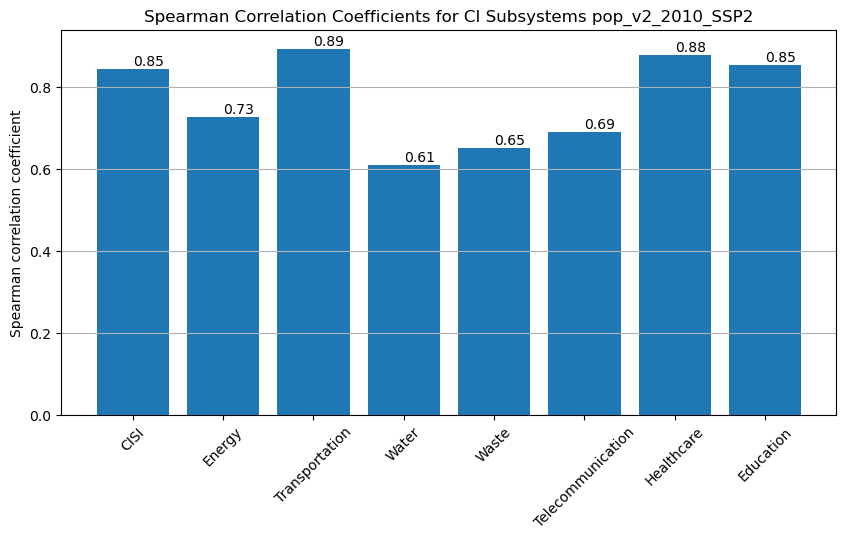

In [ ]:
# Bar plot of the Spearman correlation coefficient CISIindex vs pop_v2_2010_SSP2
plt.figure(figsize=(10, 5))
categories = ['CISI', 'Energy', 'Transportation', 'Water', 'Waste', 'Telecommunication', 'Healthcare', 'Education']
values = [spearmanr_cisi[0], spearmanr_energy[0], spearmanr_transportation[0], spearmanr_water[0], spearmanr_waste[0], spearmanr_telecommunication[0], spearmanr_healthcare[0], spearmanr_education[0]]
bars = plt.bar(categories, values)

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', va='bottom')  # va: vertical alignment

# Customize the plot
plt.ylabel('Spearman correlation coefficient')
plt.title('Spearman Correlation Coefficients for CI Subsystems pop_v2_2010_SSP2')
# Display only horizontal grid lines
plt.grid(axis='y')
# Rotate x-tick labels by 45 degrees
plt.xticks(rotation=45)
plt.show()

## CISI abs value

In [ ]:
# Bar plot of the Spearman correlation coefficient CISI abs vs pop_v2_2010_SSP2
plt.figure(figsize=(10, 5))
categories = list_col_energy
values = [spearmanr_energy_dict[col][0] for col in categories]
bars = plt.bar(categories, values)

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', va='bottom')  # va: vertical alignment
plt.title('Spearman Correlation Coefficients for Energy Subsystem abs value vs pop_v2_2010_SSP1')
plt.grid(True)

## CISI Index vs different SSPs

In [ ]:
# SpearmanrResult index vs different SSPs 

spearmanr_cisi_merkens = spearmanr(cisi_index_pop['CISI'],cisi_index_pop['total_pop_2010_SSP2_merkens'],nan_policy='omit')
spearmanr_cisi_SSP1 = spearmanr(cisi_index_pop['CISI'],cisi_index_pop['total_pop_2010_SSP1'],nan_policy='omit')
spearmanr_cisi_SSP2 = spearmanr(cisi_index_pop['CISI'],cisi_index_pop['total_pop_2010_SSP2'],nan_policy='omit')
spearmanr_cisi_SSP3 = spearmanr(cisi_index_pop['CISI'],cisi_index_pop['total_pop_2010_SSP3'],nan_policy='omit')
spearmanr_cisi_SSP4 = spearmanr(cisi_index_pop['CISI'],cisi_index_pop['total_pop_2010_SSP4'],nan_policy='omit')
spearmanr_cisi_SSP5 = spearmanr(cisi_index_pop['CISI'],cisi_index_pop['total_pop_2010_SSP5'],nan_policy='omit')

# Bar plot of the Spearman correlation coefficient index vs different SSPs
plt.figure(figsize=(10, 5))
categories = ['Merkens SSP2', 'SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5']
values = [spearmanr_cisi_merkens[0], spearmanr_cisi_SSP1[0], spearmanr_cisi_SSP2[0], spearmanr_cisi_SSP3[0], spearmanr_cisi_SSP4[0], spearmanr_cisi_SSP5[0]]
bars = plt.bar(categories, values)
# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', va='bottom')  # va: vertical alignment

# Customize the plot
plt.ylabel('Spearman correlation coefficient ')
plt.title('Spearman Correlation Coefficients across SSPs 2010')
plt.grid(True)
plt.show()

# Scatter plot

In [ ]:
def plot_correlation_and_calculate_spearman(gdf, x_col, y_col, ax, show_xlabel=False, show_ylabel=False):
    # Calculate Spearman correlation
    correlation, p_value = spearmanr(gdf[x_col], gdf[y_col], nan_policy='omit')
    
    # Create scatter plot
    ax.scatter(gdf[x_col], gdf[y_col], alpha=0.5, s=10)
    ax.set_title(f'{x_col} vs Population 2010\nSpearman Correlation: {correlation:.2f}')
    if show_xlabel:
        ax.set_xlabel(x_col)
    if show_ylabel:
        ax.set_ylabel("Population 2010")
    ax.grid(True)
    
    return correlation, p_value

## CISI index

Spearman Correlation: 0.85, P-value: 0.00e+00
Spearman Correlation: 0.73, P-value: 0.00e+00
Spearman Correlation: 0.89, P-value: 0.00e+00
Spearman Correlation: 0.61, P-value: 0.00e+00
Spearman Correlation: 0.65, P-value: 0.00e+00
Spearman Correlation: 0.69, P-value: 0.00e+00
Spearman Correlation: 0.88, P-value: 0.00e+00
Spearman Correlation: 0.85, P-value: 0.00e+00


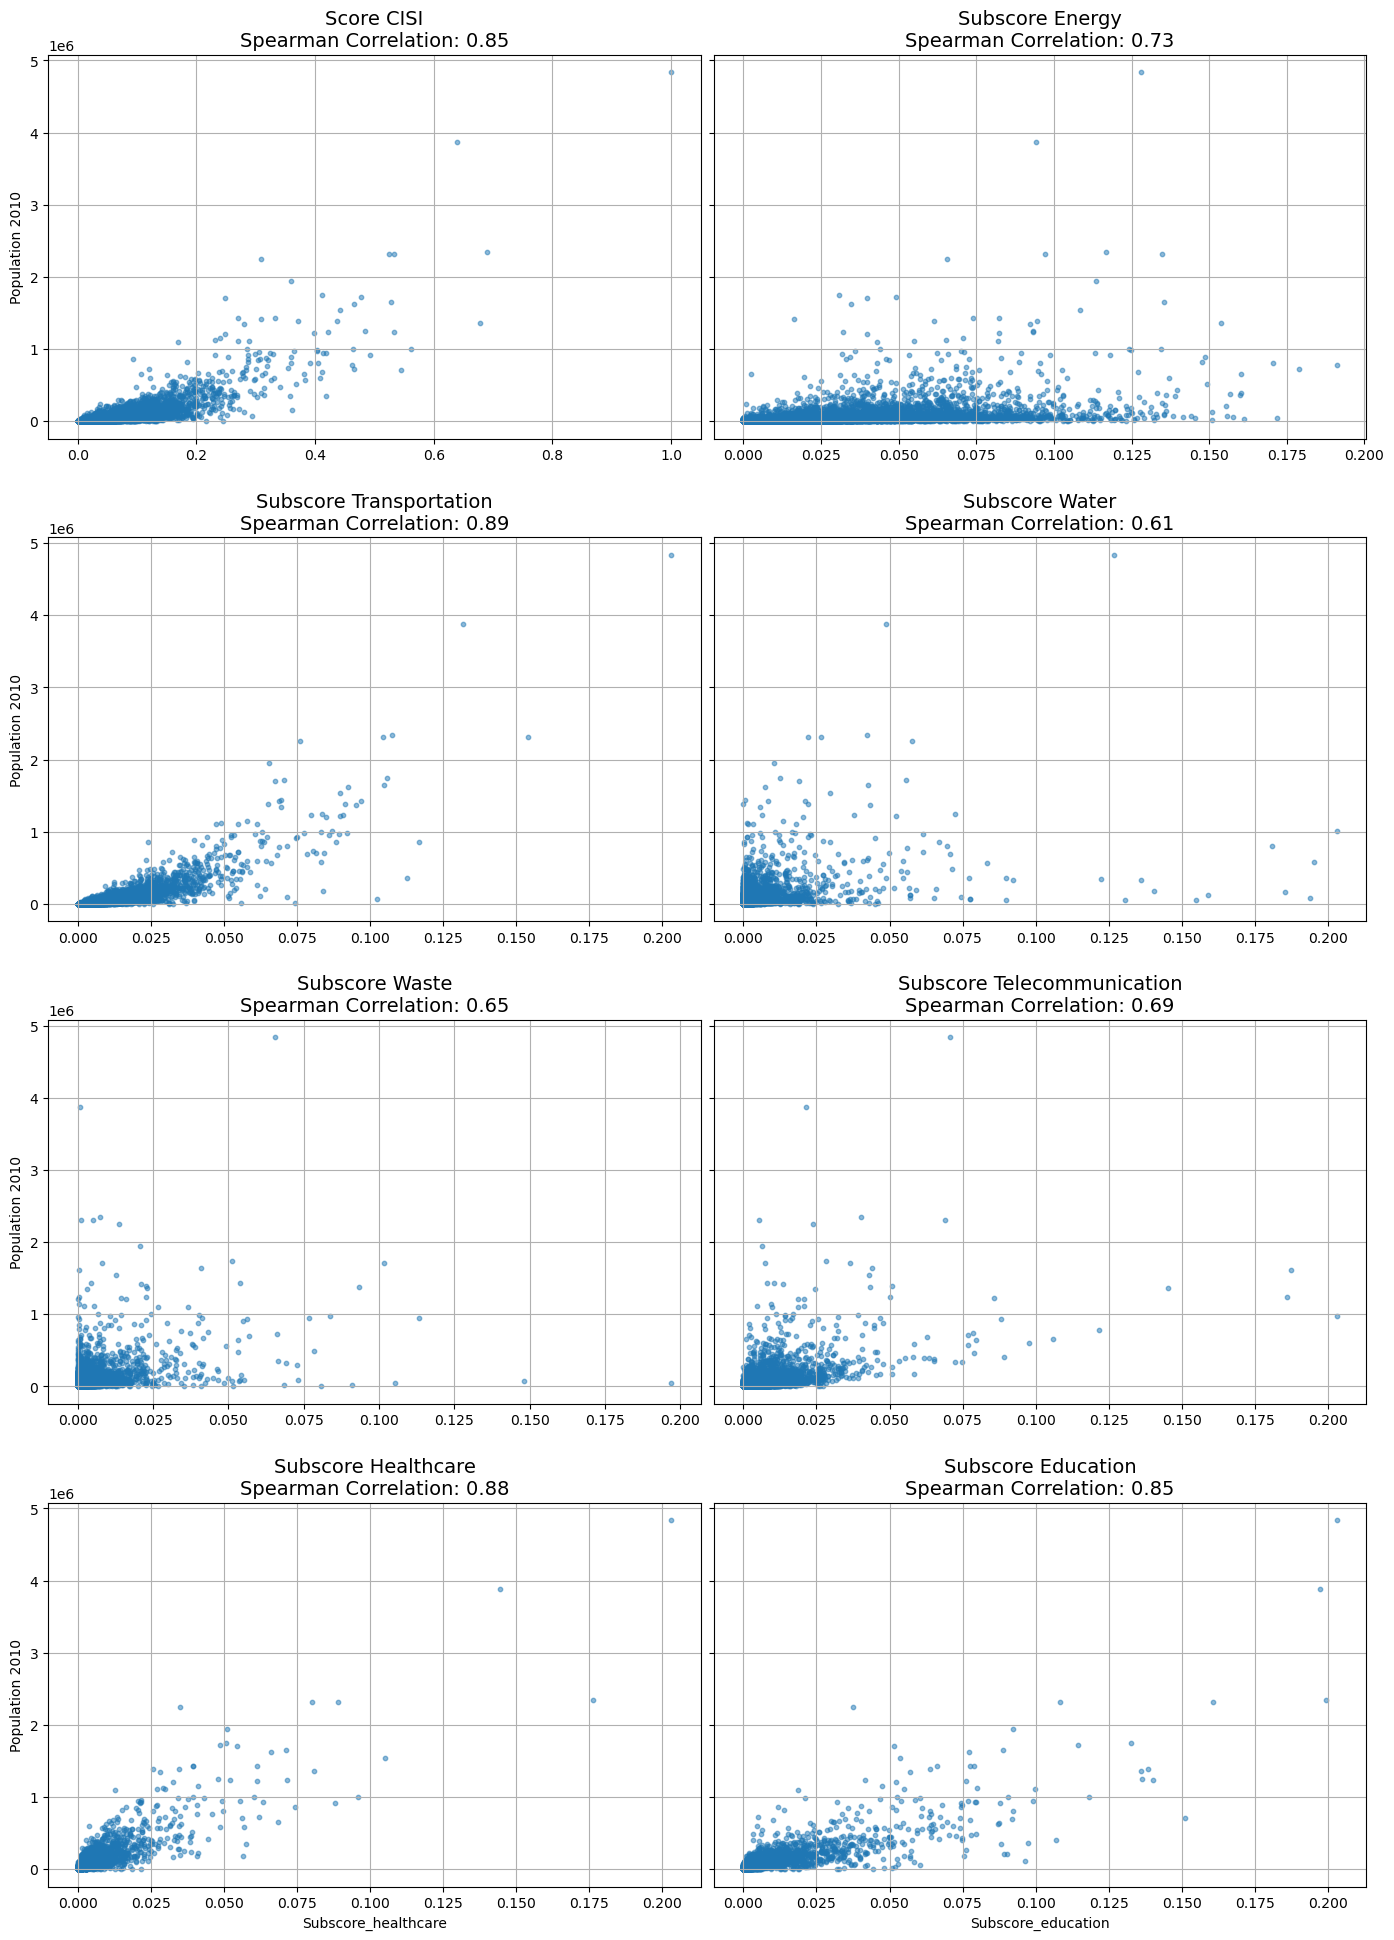

In [ ]:
# Assuming cisi_index_pop is a DataFrame with the necessary columns
fig, axs = plt.subplots(4, 2, figsize=(15, 20))
fig.tight_layout(pad=5.0)

# Remove tick labels for the second row




# Plot each subplot and control the display of x and y labels
CISI_correlation, CISI_p_value = plot_correlation_and_calculate_spearman(cisi_index_pop, 'CISI', 'total_pop_2010_SSP1', axs[0, 0], show_ylabel=True)
axs[0, 0].set_title(f'Score CISI\nSpearman Correlation: {CISI_correlation:.2f}', fontsize=14)
print(f'Spearman Correlation: {CISI_correlation:.2f}, P-value: {CISI_p_value:.2e}')


axs[0, 1].set_yticklabels([])
energy_correlation, energy_p_value = plot_correlation_and_calculate_spearman(cisi_index_pop, 'Subscore_energy', 'total_pop_2010_SSP1', axs[0, 1])
axs[0, 1].set_title(f'Subscore Energy\nSpearman Correlation: {energy_correlation:.2f}', fontsize=14)
print(f'Spearman Correlation: {energy_correlation:.2f}, P-value: {energy_p_value:.2e}')

transportation_correlation, transportation_p_value = plot_correlation_and_calculate_spearman(cisi_index_pop, 'Subscore_transportation', 'total_pop_2010_SSP1', axs[1, 0], show_ylabel=True)
axs[1, 0].set_title(f'Subscore Transportation\nSpearman Correlation: {transportation_correlation:.2f}', fontsize=14)
print(f'Spearman Correlation: {transportation_correlation:.2f}, P-value: {transportation_p_value:.2e}')

axs[1, 1].set_yticklabels([])
water_correlation, water_p_value = plot_correlation_and_calculate_spearman(cisi_index_pop, 'Subscore_water', 'total_pop_2010_SSP1', axs[1, 1])
axs[1, 1].set_title(f'Subscore Water\nSpearman Correlation: {water_correlation:.2f}', fontsize=14)
print(f'Spearman Correlation: {water_correlation:.2f}, P-value: {water_p_value:.2e}')

waste_correlation, waste_p_value = plot_correlation_and_calculate_spearman(cisi_index_pop, 'Subscore_waste', 'total_pop_2010_SSP1', axs[2, 0], show_ylabel=True)
axs[2, 0].set_title(f'Subscore Waste\nSpearman Correlation: {waste_correlation:.2f}', fontsize=14)
print(f'Spearman Correlation: {waste_correlation:.2f}, P-value: {waste_p_value:.2e}')

axs[2, 1].set_yticklabels([])
telecommunication_correlation, telecommunication_p_value = plot_correlation_and_calculate_spearman(cisi_index_pop, 'Subscore_telecommunication', 'total_pop_2010_SSP1', axs[2, 1])
axs[2, 1].set_title(f'Subscore Telecommunication\nSpearman Correlation: {telecommunication_correlation:.2f}', fontsize=14)
print(f'Spearman Correlation: {telecommunication_correlation:.2f}, P-value: {telecommunication_p_value:.2e}')

healthcare_correlation, healthcare_p_value = plot_correlation_and_calculate_spearman(cisi_index_pop, 'Subscore_healthcare', 'total_pop_2010_SSP1', axs[3, 0], show_xlabel=True, show_ylabel=True)
axs[3, 0].set_title(f'Subscore Healthcare\nSpearman Correlation: {healthcare_correlation:.2f}', fontsize=14)
print(f'Spearman Correlation: {healthcare_correlation:.2f}, P-value: {healthcare_p_value:.2e}')

axs[3, 1].set_yticklabels([])
education_correlation, education_p_value = plot_correlation_and_calculate_spearman(cisi_index_pop, 'Subscore_education', 'total_pop_2010_SSP1', axs[3, 1], show_xlabel=True)
axs[3, 1].set_title(f'Subscore Education\nSpearman Correlation: {education_correlation:.2f}', fontsize=14)
print(f'Spearman Correlation: {education_correlation:.2f}, P-value: {education_p_value:.2e}')
# Adjust layout to reduce space between columns
plt.subplots_adjust(wspace=0.02)

plt.show()

## CISI absolute value

In [ ]:
# # Plot scater plot of CISI abs value vs population 2010 SSP2 for all col of energy  with plot_correlation_and_calculate_spearman() function
# fig, axs = plt.subplots(len(list_col_energy), 1, figsize=(10, 5 * len(list_col_energy)))

# # Ensure axs is a 2D array even if there's only one row
# if len(list_col_energy) == 1:
#     axs = np.array([axs])

# # Iterate over the columns and plot
# for i, col in enumerate(list_col_energy):
#     CISI_correlation, CISI_p_value = plot_correlation_and_calculate_spearman(cisi_abs_val_energy_pop, col, 'total_pop_2010_SSP1', axs[i])

# plt.tight_layout()
# plt.show()


# CISI index - Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV


In [ ]:
# # Train test split for linear regression

# columns = ['CISI', 'Subscore_energy', 'Subscore_transportation', 'Subscore_water',
#            'Subscore_waste', 'Subscore_telecommunication', 'Subscore_healthcare', 'Subscore_education']

# cisi_index_pop_na = cisi_index_pop
# cisi_index_pop = cisi_index_pop.dropna(subset=['total_pop_2010_SSP2'])

# def split_data(df, feature_col, target_col, test_size=0.2, random_state=42):
#     """
#     Splits the DataFrame into training and testing sets based on the specified feature and target columns.

#     Parameters:
#     - df: pandas DataFrame
#     - feature_col: str, name of the feature column
#     - target_col: str, name of the target column
#     - test_size: float, proportion of the dataset to include in the test split
#     - random_state: int, random seed for reproducibility

#     Returns:
#     - X_train: training set features
#     - X_test: testing set features
#     - y_train: training set targets
#     - y_test: testing set targets
#     """
#     X = df[feature_col].values.reshape(-1, 1)
#     y = df[target_col].values
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
#     return X_train, X_test, y_train, y_test

# # Only CISI
# X_train, X_test, y_train, y_test = split_data(cisi_index_pop, 'total_pop_2010_SSP2', 'CISI')
# # all the other subscores
# X_train_energy, X_test_energy, y_train_energy, y_test_energy = split_data(cisi_index_pop, 'total_pop_2010_SSP2', 'Subscore_energy')
# X_train_transportation, X_test_transportation, y_train_transportation, y_test_transportation = split_data(cisi_index_pop, 'total_pop_2010_SSP2', 'Subscore_transportation')
# X_train_water, X_test_water, y_train_water, y_test_water = split_data(cisi_index_pop, 'total_pop_2010_SSP2', 'Subscore_water')
# X_train_waste, X_test_waste, y_train_waste, y_test_waste = split_data(cisi_index_pop, 'total_pop_2010_SSP2', 'Subscore_waste')
# X_train_telecommunication, X_test_telecommunication, y_train_telecommunication, y_test_telecommunication = split_data(cisi_index_pop, 'total_pop_2010_SSP2', 'Subscore_telecommunication')
# X_train_healthcare, X_test_healthcare, y_train_healthcare, y_test_healthcare = split_data(cisi_index_pop, 'total_pop_2010_SSP2', 'Subscore_healthcare')
# X_train_education, X_test_education, y_train_education, y_test_education = split_data(cisi_index_pop, 'total_pop_2010_SSP2', 'Subscore_education')


In [ ]:
# # Only CISI
# # Linear Regression model
# linear_model = LinearRegression()
# linear_model.fit(X_train, y_train)
# linear_score = linear_model.score(X_test, y_test)
# linear_predictions = linear_model.predict(X_test)


# # function to perform the linear regression on all the data
# def perform_linear_regression(X_train, X_test, y_train, y_test):
#     """
#     Performs linear regression on the training and testing sets and returns the model, score, and predictions.

#     Parameters:
#     - X_train: training set features
#     - X_test: testing set features
#     - y_train: training set targets
#     - y_test: testing set targets

#     Returns:
#     - model: trained linear regression model
#     - score: R^2 score of the model
#     - predictions: model predictions on the testing set
#     """
#     model = LinearRegression()
#     model.fit(X_train, y_train)
#     score = model.score(X_test, y_test)
#     predictions = model.predict(X_test)
#     return model, score, predictions


# # Perform linear regression on all the data
# linear_model_energy, linear_score_energy, linear_predictions_energy = perform_linear_regression(X_train_energy, X_test_energy, y_train_energy, y_test_energy)
# linear_model_transportation, linear_score_transportation, linear_predictions_transportation = perform_linear_regression(X_train_transportation, X_test_transportation, y_train_transportation, y_test_transportation)
# linear_model_water, linear_score_water, linear_predictions_water = perform_linear_regression(X_train_water, X_test_water, y_train_water, y_test_water)
# linear_model_waste, linear_score_waste, linear_predictions_waste = perform_linear_regression(X_train_waste, X_test_waste, y_train_waste, y_test_waste)
# linear_model_telecommunication, linear_score_telecommunication, linear_predictions_telecommunication = perform_linear_regression(X_train_telecommunication, X_test_telecommunication, y_train_telecommunication, y_test_telecommunication)
# linear_model_healthcare, linear_score_healthcare, linear_predictions_healthcare = perform_linear_regression(X_train_healthcare, X_test_healthcare, y_train_healthcare, y_test_healthcare)
# linear_model_education, linear_score_education, linear_predictions_education = perform_linear_regression(X_train_education, X_test_education, y_train_education, y_test_education)


In [ ]:
# # Calculate evaluation metrics

# # for the linear
# linear_rmse = np.sqrt(mean_absolute_error(y_test, linear_predictions))
# linear_r2 = r2_score(y_test, linear_predictions)

# # Print the evaluation results
# print("Linear Regression:")
# print("RMSE:", linear_rmse)
# print("R-squared:", linear_r2)

# # function to calculate the evaluation metrics
# def calculate_and_print_evaluation_metrics(y_true, y_pred, model_name="Model"):
#     """
#     Calculates and prints evaluation metrics for regression models.

#     Parameters:
#     - y_true: array-like, true target values
#     - y_pred: array-like, predicted target values
#     - model_name: str, name of the model (default is "Model")

#     Returns:
#     - rmse: float, root mean squared error
#     - r2: float, R-squared score
#     """
#     rmse = np.sqrt(mean_squared_error(y_true, y_pred))
#     r2 = r2_score(y_true, y_pred)
#     print(f"{model_name} Regression:")
#     print(f"RMSE: {rmse}")
#     print(f"R-squared: {r2}")
#     return rmse, r2

# linear_rmse, linear_r2 = calculate_and_print_evaluation_metrics(y_test, linear_predictions, "Linear")
# linear_rmse_energy, linear_r2_energy = calculate_and_print_evaluation_metrics(y_test_energy, linear_predictions_energy, "Linear Energy")
# linear_rmse_transportation, linear_r2_transportation = calculate_and_print_evaluation_metrics(y_test_transportation, linear_predictions_transportation, "Linear Transportation")
# linear_rmse_water, linear_r2_water = calculate_and_print_evaluation_metrics(y_test_water, linear_predictions_water, "Linear Water")
# linear_rmse_waste, linear_r2_waste = calculate_and_print_evaluation_metrics(y_test_waste, linear_predictions_waste, "Linear Waste")
# linear_rmse_telecommunication, linear_r2_telecommunication = calculate_and_print_evaluation_metrics(y_test_telecommunication, linear_predictions_telecommunication, "Linear Telecommunication")
# linear_rmse_healthcare, linear_r2_healthcare = calculate_and_print_evaluation_metrics(y_test_healthcare, linear_predictions_healthcare, "Linear Healthcare")
# linear_rmse_education, linear_r2_education = calculate_and_print_evaluation_metrics(y_test_education, linear_predictions_education, "Linear Education")


In [ ]:
# # Collect RMSE and R² values
# rmse_values = [
#     linear_rmse, linear_rmse_energy, linear_rmse_transportation, linear_rmse_water,
#     linear_rmse_waste, linear_rmse_telecommunication, linear_rmse_healthcare, linear_rmse_education
# ]

# r2_values = [
#     linear_r2, linear_r2_energy, linear_r2_transportation, linear_r2_water,
#     linear_r2_waste, linear_r2_telecommunication, linear_r2_healthcare, linear_r2_education
# ]

# categories = [
#     'CISI', 'Energy', 'Transportation', 'Water', 'Waste', 'Telecommunication', 'Healthcare', 'Education'
# ]

# # Bar plot of RMSE values
# plt.figure(figsize=(12, 6))
# bars_rmse = plt.bar(categories, rmse_values)

# # Add values on top of the bars
# for bar in bars_rmse:
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.3f}', va='bottom')  # va: vertical alignment

# # Customize the plot
# plt.ylabel('RMSE')
# plt.title('RMSE for Each CI Subsystem')
# plt.grid(True)
# plt.show()

# # Bar plot of R² values
# plt.figure(figsize=(12, 6))
# bars_r2 = plt.bar(categories, r2_values)

# # Add values on top of the bars
# for bar in bars_r2:
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.3f}', va='bottom')  # va: vertical alignment

# # Customize the plot
# plt.ylabel('R²')
# plt.title('R² for Each CI Subsystem')
# plt.grid(True)
# plt.show()

In [ ]:
# # #linear regression 
# # plt.scatter(y_test, linear_predictions)
# # plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linestyle='--')
# # plt.title('Linear Regression - Actual vs Predicted')
# # plt.xlabel('Actual Values')
# # plt.ylabel('Predicted Values')
# # plt.show()

# import matplotlib.pyplot as plt

# def plot_actual_vs_predicted(y_trues, y_preds, model_names):
#     """
#     Plots actual vs. predicted values for multiple regression models in a 2-column layout.

#     Parameters:
#     - y_trues: list of array-like, true target values for each model
#     - y_preds: list of array-like, predicted target values for each model
#     - model_names: list of str, names of the models
#     """
#     num_models = len(y_preds)
#     num_rows = (num_models + 1) // 2  # Calculate the number of rows needed

#     plt.figure(figsize=(15, 5 * num_rows))
    
#     for i, (y_true, y_pred, model_name) in enumerate(zip(y_trues, y_preds, model_names)):
#         plt.subplot(num_rows, 2, i + 1)
#         plt.scatter(y_true, y_pred, alpha=0.5)
#         plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
#         plt.xlabel('Actual')
#         plt.ylabel('Predicted')
#         plt.title(f'Actual vs. Predicted - {model_name} Regression')
#         plt.grid(True)
    
#     plt.tight_layout()
#     plt.show()
    

# # Plot actual vs. predicted values for all the linear regression model
# y_preds = [linear_predictions, linear_predictions_energy, linear_predictions_transportation, linear_predictions_water, linear_predictions_waste, linear_predictions_telecommunication, linear_predictions_healthcare, linear_predictions_education]
# y_tests = [y_test, y_test_energy, y_test_transportation, y_test_water, y_test_waste, y_test_telecommunication, y_test_healthcare, y_test_education]
# model_names = ["Linear CISI index", "Linear Energy", "Linear Transportation", "Linear Water", "Linear Waste", "Linear Telecommunication", "Linear Healthcare", "Linear Education"]

# plot_actual_vs_predicted(y_tests, y_preds, model_names)

In [ ]:
# # Apply the linear model to the cisi_index_pop['total_pop_2100'] data and save as a new column
# #cisi_index_pop['total_pop_2100'] = cisi_index_pop['total_pop_2100'].fillna(0)
# # Ensure you are working with a copy of the DataFrame
# cisi_index_pop = cisi_index_pop.copy()

# # Use .loc to set the new column values
# cisi_index_pop.loc[:, 'CISI_predicted_2100_linreg'] = linear_model.predict(cisi_index_pop['total_pop_2100_SSP2'].values.reshape(-1, 1))

In [ ]:
# # convert to gdf and plot cisi_index_pop['CISI_predicted_2100']
# cisi_index_pop.geometry = shapely.from_wkb(cisi_index_pop.geometry)
# cisi_index_pop = gpd.GeoDataFrame(cisi_index_pop.copy())

# #plot the gpd cisi_index_pop['CISI_predicted_2100']
# cisi_index_pop.plot(column='CISI_predicted_2100_linreg', legend=True)

# Crossvalidation

In [ ]:
# # Only CISI index
# X = cisi_index_pop['total_pop_2010_SSP2'].values.reshape(-1, 1)
# y = cisi_index_pop['CISI'].values

# #X,y = datasets.make_regression()
# lr_model = LinearRegression()
# lr_model.fit(X_train, y_train)
# # Define the parameters for GridSearchCV
# parameters = {'fit_intercept': [True, False]}
# #clf = GridSearchCV(lr_model, parameters, refit=True, cv=5)
# clf = GridSearchCV(lr_model, parameters, cv=3)
# best_model = clf.fit(X,y)

In [ ]:
# # Print the best parameters and the best score
# print("Best Parameters:", best_model.best_params_)
# print("Best Score:", best_model.best_score_)

# # Make predictions using the best model
# y_pred = best_model.predict(X)

# # Calculate the R² score
# r2 = r2_score(y, y_pred)
# print("R² Score:", r2)

# # RMSE
# rmse = np.sqrt(mean_squared_error(y, y_pred))
# print("RMSE:", rmse)

# # #Plot the best model
# # plt.figure(figsize=(10, 6))
# # plt.scatter(X, y, color='blue', label='Actual')
# # plt.plot(X, y_pred, color='red', label='Predicted')
# # plt.title('Linear Regression CV - Best Model')

# plt.scatter(y, y_pred, alpha=0.5)
# plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.title('CISI index - Linear Regression CV split - Best Model')
# plt.grid(True)

# CISI index - Outlier treatment


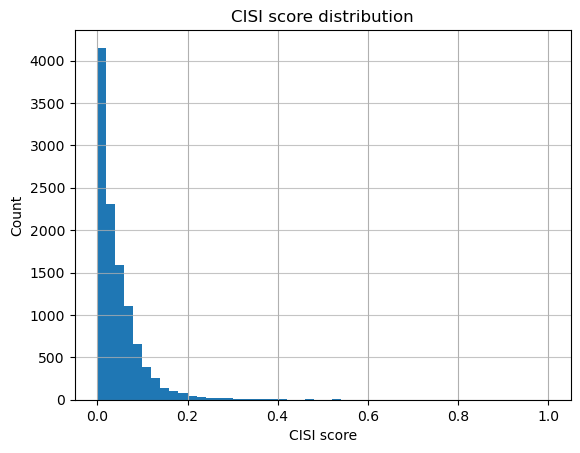

In [ ]:
# plot disitribution of the cisi_index_pop['CISI']
cisi_index_pop['CISI'].hist(bins=50)
# x axis label
plt.xlabel('CISI score')
plt.ylabel('Count')
plt.title('CISI score distribution')
# grid on bins
plt.grid(axis='y', alpha=0.75)

In [ ]:
# Trim cis_index_pop['CISI'] to remove outliers with z-score > 2
# from scipy.stats import zscore
# z_scores = zscore(X)
# # Define a threshold for identifying outliers
# threshold = 1
# # Identify outliers
# outliers = (z_scores > threshold) | (z_scores < -threshold)
# cisi_index_pop['CISI_outliers'] = outliers
# # Filter out the outliers
# cisi_index_pop_trimmed = cisi_index_pop[~outliers]
# cisi_index_pop_trimmed['CISI'].hist(bins=50)

#drop the duplicate bin edges and ensure that the quantiles are calculated correctly.
cisi_index_pop['quantile_cisi'] = pd.qcut(cisi_index_pop['CISI'], q=40, labels=False, duplicates='drop')
cisi_index_pop.head(20)
#filter out the outliers >97% quantile
# Filter out the outliers >97% quantile
quantile_97 = cisi_index_pop['CISI'].quantile(0.97)
filtered_cisi_index_pop = cisi_index_pop[cisi_index_pop['CISI'] <= quantile_97]

# Display the filtered DataFrame
print(filtered_cisi_index_pop)

           CISI  Subscore_energy  Subscore_transportation  Subscore_water  \
60     0.047099         0.000000                 0.031266        0.003065   
61     0.052370         0.018855                 0.016523        0.000000   
62     0.044551         0.009973                 0.017686        0.000000   
63     0.071275         0.010167                 0.017687        0.003088   
64     0.000233         0.000000                 0.000147        0.000000   
...         ...              ...                      ...             ...   
14500  0.003854         0.001758                 0.001777        0.000000   
14501  0.007304         0.005667                 0.001377        0.000000   
14513  0.002766         0.001331                 0.001435        0.000000   
14515  0.003512         0.001365                 0.001638        0.000000   
14517  0.005675         0.004090                 0.000961        0.000000   

       Subscore_waste  Subscore_telecommunication  Subscore_healthcare  \
6

<Axes: >

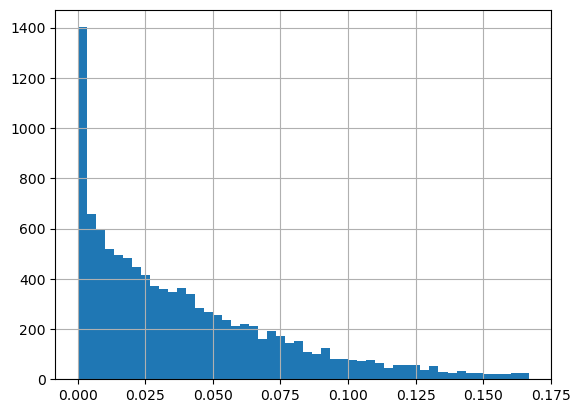

In [ ]:
filtered_cisi_index_pop['CISI'].hist(bins=50)

Spearman Correlation: 0.83, P-value: 0.00e+00


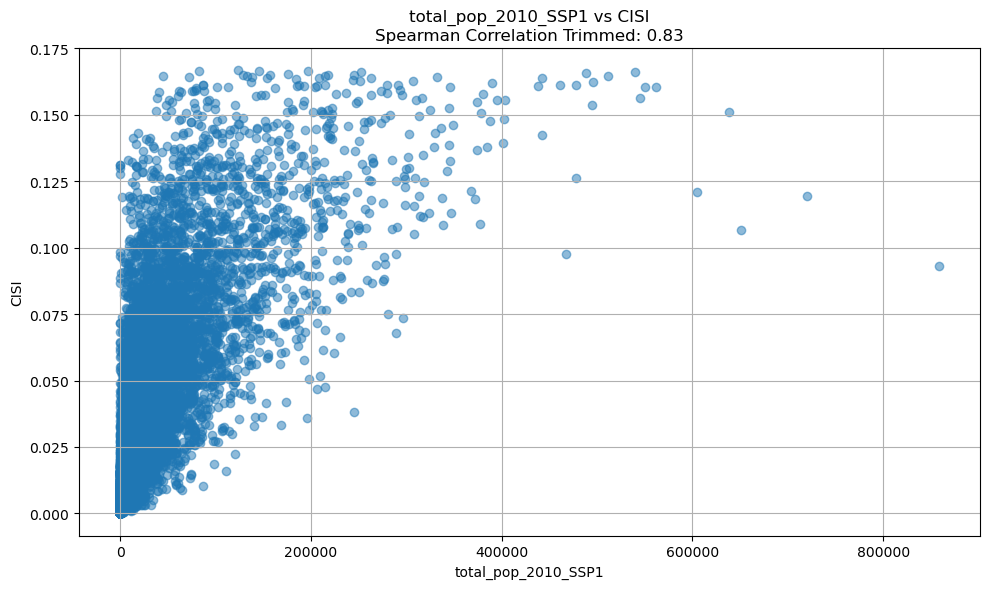

In [ ]:
# Spearman correlation trimmed
spearmanr_cisi_trimmed = spearmanr(filtered_cisi_index_pop['CISI'],filtered_cisi_index_pop['total_pop_2010_SSP1'],nan_policy='omit')
print(f'Spearman Correlation: {spearmanr_cisi_trimmed[0]:.2f}, P-value: {spearmanr_cisi_trimmed[1]:.2e}')


# Function to make scatter plot of the trimmed data
def plot_correlation_and_calculate_spearman_1graph(gdf, x_col, y_col, ax):
    # Calculate Spearman correlation
    correlation, p_value = spearmanr(gdf[x_col], gdf[y_col], nan_policy='omit')
    # Scatter plot
    ax.scatter(gdf[x_col], gdf[y_col], alpha=0.5)
    ax.set_title(f'{x_col} vs {y_col}\nSpearman Correlation Trimmed: {correlation:.2f}')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.grid(True)
    return correlation, p_value

# Example usage
fig, axs = plt.subplots(1, 1, figsize=(10, 6))

CISI_correlation_trimmed, CISI_p_value_trimmed = plot_correlation_and_calculate_spearman_1graph(filtered_cisi_index_pop, 'total_pop_2010_SSP1','CISI', axs)

plt.tight_layout()
plt.show()

# Curve fitting

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [ ]:
# Assuming cisi_index_pop_trimmed is already defined and contains the necessary columns
X = cisi_index_pop['total_pop_2010_SSP1'].values
y = cisi_index_pop['CISI'].values

X_trimmed = filtered_cisi_index_pop['total_pop_2010_SSP1'].values
y_trimmed = filtered_cisi_index_pop['CISI'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    cisi_index_pop['total_pop_2010_SSP1'].values,
    cisi_index_pop['CISI'].values,
    test_size=0.2,
    random_state=42
)

# Split the trimmed data into training and testing sets
X_train_trimmed, X_test_trimmed, y_train_trimmed, y_test_trimmed = train_test_split(
    filtered_cisi_index_pop['total_pop_2010_SSP1'].values,
    filtered_cisi_index_pop['CISI'].values,
    test_size=0.2,
    random_state=42
)

## Sigmoid CISI

In [ ]:
# # Define the sigmoid function
# def sigmoid(x, L, x0, k, b):
#     y = L / (1 + np.exp(-k * (x - x0))) + b
#     return y

# # Initial guess for the parameters
# p0 = [1, 60000, 0.000081, min(y)]

# #Define bounds for the parameters
# bounds = (
#     [1, min(X), 0, 0],  # Lower bounds for L, x0, k, b
#     [1 * 2, max(X), np.inf, max(y)]  # Upper bounds for L, x0, k, b
# )


# # Fit the sigmoid function to the data with increased maxfev
# popt, pcov = curve_fit(sigmoid, X, y, p0, method='trf',bounds=bounds, maxfev=10000000)

# # Print the optimal parameters
# print("Optimal parameters:", popt)

# # Plot the data and the fitted curve
# plt.figure(figsize=(10, 6))
# plt.scatter(X, y, label='CISI', alpha=0.5)
# x_fit = np.linspace(min(X), max(X), 1000)
# y_fit = sigmoid(x_fit, *popt)
# plt.plot(x_fit, y_fit, label='Fitted S-curve', color='red')
# plt.xlabel('Total Population 2010')
# plt.ylabel('CISI')
# plt.title('Fitted S-curve to the CISI index')
# plt.legend()
# plt.grid(True)
# plt.show()


### Crossvalidation on Sigmoid

In [ ]:
# from sklearn.model_selection import KFold

# # Assuming cisi_index_pop_trimmed is already defined and contains the necessary columns
# X = cisi_index_pop['total_pop_2010_SSP2'].values
# y = cisi_index_pop['CISI'].values

# # Define the sigmoid function
# def sigmoid(x, L, x0, k, b):
#     y = L / (1 + np.exp(-k * (x - x0))) + b
#     return y

# # Initial guess for the parameters
# p0 = [max(y), np.median(X), 1, min(y)]

# # Define bounds for the parameters
# bounds = (
#     [0, min(X), 0, 0],  # Lower bounds for L, x0, k, b
#     [max(y) * 2, max(X), 10, max(y)]  # Upper bounds for L, x0, k, b
# )

# # Implement cross-validation
# kf = KFold(n_splits=3, shuffle=True, random_state=42)
# r2_scores = []
# rmse_scores = []
# y_actual = []
# y_predicted = []

# for train_index, test_index in kf.split(X):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
    
#     # Fit the sigmoid function to the training data
#     popt, pcov = curve_fit(sigmoid, X_train, y_train, p0, method='dogbox', maxfev=30000, bounds=bounds)
    
#     # Predict on the test data
#     y_test_pred = sigmoid(X_test, *popt)
    
#     # Compute R² and RMSE
#     r2 = r2_score(y_test, y_test_pred)
#     rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
#     r2_scores.append(r2)
#     rmse_scores.append(rmse)
    
#     y_actual.extend(y_test)
#     y_predicted.extend(y_test_pred)

# # Print the cross-validation results
# # print("Cross-validation R² scores:", r2_scores)
# # print("Mean R² score:", np.mean(r2_scores))
# print("Cross-validation RMSE scores:", rmse_scores)
# print("Mean RMSE score:", np.mean(rmse_scores))

# # Plot actual vs. predicted values
# plt.figure(figsize=(10, 6))
# plt.scatter(y_actual, y_predicted, alpha=0.5)
# plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], 'r--', lw=2)
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.title('Actual vs. Predicted - Sigmoid Function Fitting')
# plt.grid(True)
# plt.show()

In [ ]:
# # Define the sigmoid function
# def sigmoid(x, L, x0, k, b):
#     y = L / (1 + np.exp(-k * (x - x0))) + b
#     return y

# # Initial guess for the parameters
# p0 = [max(y), np.median(X), 1, min(y)]

# # Define bounds for the parameters
# bounds = (
#     [0, min(X), 0, 0],  # Lower bounds for L, x0, k, b
#     [max(y) * 2, max(X), 10, max(y)]  # Upper bounds for L, x0, k, b
# )

# # Implement cross-validation
# kf = KFold(n_splits=3, shuffle=True, random_state=42)
# r2_scores = []
# rmse_scores = []
# y_actual = []
# y_predicted = []

# for train_index, test_index in kf.split(X):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
    
#     # Fit the sigmoid function to the training data
#     popt, pcov = curve_fit(sigmoid, X_train, y_train, p0, method='dogbox', maxfev=30000, bounds=bounds)
    
#     # Predict on the test data
#     y_test_pred = sigmoid(X_test, *popt)
    
#     # Compute R² and RMSE
#     r2 = r2_score(y_test, y_test_pred)
#     rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
#     r2_scores.append(r2)
#     rmse_scores.append(rmse)
    
#     y_actual.extend(y_test)
#     y_predicted.extend(y_test_pred)

# # Print the cross-validation results
# print("Cross-validation R² scores:", r2_scores)
# print("Mean R² score:", np.mean(r2_scores))
# print("Cross-validation RMSE scores:", rmse_scores)
# print("Mean RMSE score:", np.mean(rmse_scores))

# # Plot actual vs. predicted values
# plt.figure(figsize=(10, 6))
# plt.scatter(y_actual, y_predicted, alpha=0.5)
# plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], 'r--', lw=2)
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.title('Actual vs. Predicted - Sigmoid Function Fitting')
# plt.grid(True)
# plt.show()

# Neg Exp

## Fitting full dataset

Optimal parameters: [1.00000000e+00 6.31646582e-07]


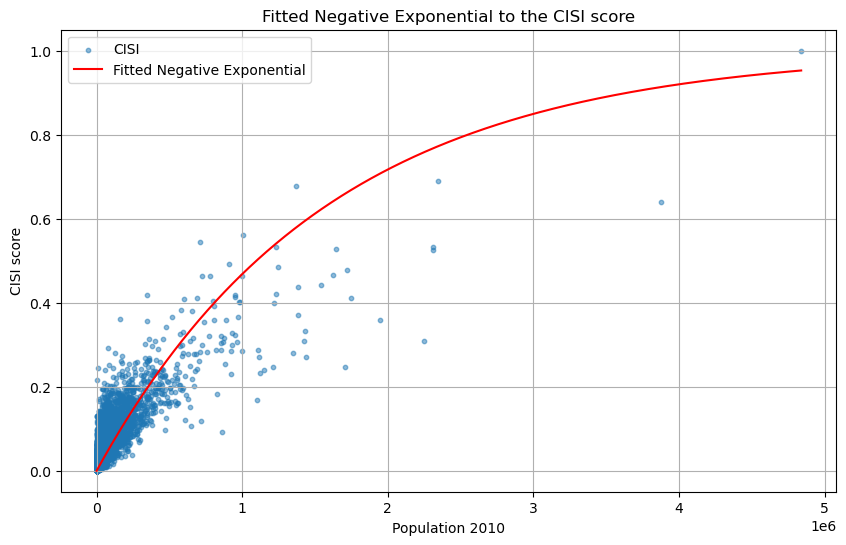

In [ ]:
#https://robotenique.github.io/posts/nonlinear-models/#convexconcave-models
def negative_exponential(x, b, k):
    return b * (1 - np.exp(-k * x))

def negative_exponential_jac(x, b, k):
    return np.array([1 - np.exp(-k * x), b * x * np.exp(-k * x)]).T

offset = 0

## fit full dataset
res, pcov = curve_fit(
    f=negative_exponential,
    jac=negative_exponential_jac,
    xdata=X,
    ydata=y,
    # Initial guess for the parameters (B=ASYMPTOTE, K = RATE)
    p0 = [1, 10000],  # Initial guess for [b, k]
    maxfev=100000,
    bounds = ([1, 0], [1.2, 20000]),  # LOW[B, K], HIGH [B, K] adding constraints b & k
)
b, k = res

# Print the optimal parameters
print("Optimal parameters:", res)
# Plot the data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='CISI', alpha=0.5, s=10)
x_fit = np.linspace(min(X), max(X), 1000)
y_fit = negative_exponential(x_fit, b, k)
plt.plot(x_fit, y_fit, label='Fitted Negative Exponential', color='red')
plt.xlabel('Population 2010')
plt.ylabel('CISI score')
plt.title('Fitted Negative Exponential to the CISI score')
plt.legend()
plt.grid(True)
plt.show()


## Pred y_test

Text(0.5, 1.0, 'Actual vs. Predicted - Negative Exponential Function CISI')

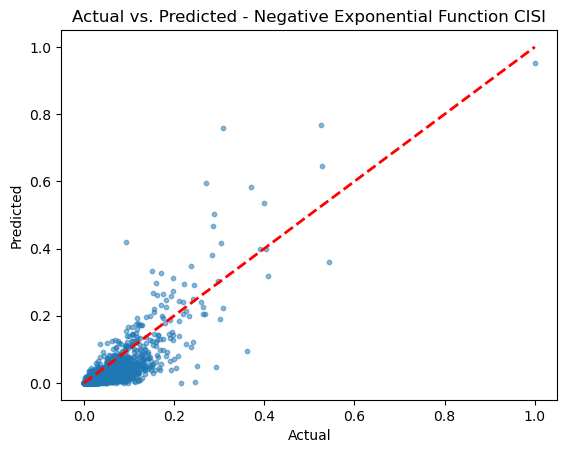

In [ ]:

# Predict on the test data
y_test_pred = negative_exponential(X_test, *res)

# plot the actual vs predicted
plt.scatter(y_test, y_test_pred, alpha=0.5, s=10)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted - Negative Exponential Function CISI')

In [ ]:
# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("RMSE:", rmse)

RMSE: 0.04024146598250325


## Fitting the trimmed dataset

Optimal parameters: [1.00000000e+00 7.82424829e-07]


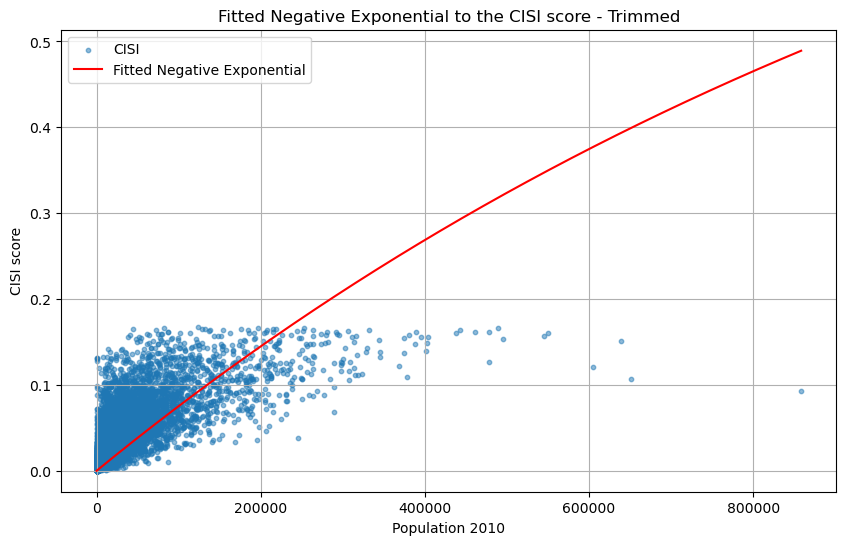

In [ ]:
## fit full dataset
res_trim, pcov_trim = curve_fit(
    f=negative_exponential,
    jac=negative_exponential_jac,
    xdata=X_train_trimmed,
    ydata=y_train_trimmed,
    # Initial guess for the parameters (B=ASYMPTOTE, K = RATE)
    p0 = [1, 10000],  # Initial guess for [b, k]
    maxfev=100000,
    bounds = ([1, 0], [1.2, 20000]),  # LOW[B, K], HIGH [B, K] adding constraints b & k
)
b, k = res_trim

# Print the optimal parameters
print("Optimal parameters:", res_trim)
# Plot the data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(X_train_trimmed, y_train_trimmed, label='CISI', alpha=0.5, s=10)
x_fit = np.linspace(min(X_train_trimmed), max(X_train_trimmed), 1000)
y_fit = negative_exponential(x_fit, b, k)
plt.plot(x_fit, y_fit, label='Fitted Negative Exponential', color='red')
plt.xlabel('Population 2010')
plt.ylabel('CISI score')
plt.title('Fitted Negative Exponential to the CISI score - Trimmed')
plt.legend()
plt.grid(True)
plt.show()


Optimal parameters: [1.00000000e+00 7.82424829e-07]


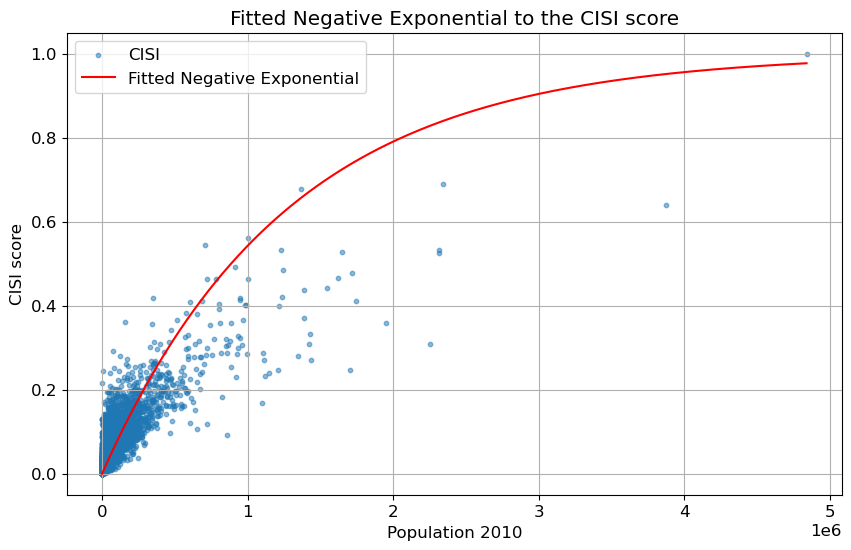

In [ ]:
# Print the optimal parameters
print("Optimal parameters:", res_trim)
# Plot the data and the fitted curve
#text size
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='CISI', alpha=0.5, s=10)
x_fit = np.linspace(min(X), max(X), 1000)
y_fit = negative_exponential(x_fit, b, k)
plt.plot(x_fit, y_fit, label='Fitted Negative Exponential', color='red')
plt.xlabel('Population 2010')
plt.ylabel('CISI score')
plt.title('Fitted Negative Exponential to the CISI score')
plt.legend()
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Actual vs. Predicted - Negative Exponential Function CISI')

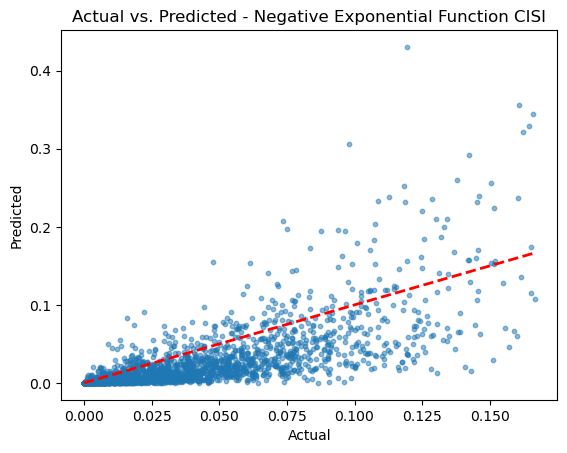

In [ ]:
# Predict on the test data
y_test_trimmed_pred = negative_exponential(X_test_trimmed, *res_trim)

# plot the actual vs predicted
plt.scatter(y_test_trimmed, y_test_trimmed_pred, alpha=0.5, s=10)
plt.plot([min(y_test_trimmed), max(y_test_trimmed)], [min(y_test_trimmed), max(y_test_trimmed)], 'r--', lw=2)
# plt.xlim(0.0, 0.5)  # Set x-axis range
# plt.ylim(0.0, 0.5)  # Set y-axis range
#plt.axis('equal')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted - Negative Exponential Function CISI')

In [ ]:
print(type(res_trim))
# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test_trimmed, y_test_trimmed_pred))
print("RMSE:", rmse)

<class 'numpy.ndarray'>
RMSE: 0.03265267260422929


# Predictions 2100

In [ ]:
# Predictions using population 2100
#Function to predict the CISI index for all columns containing total_pop_2100
def predict_cisi_index_2100(df, res):
    """
    Predicts the CISI index for the year 2100 using the negative exponential function.

    Parameters:
    - df: pandas DataFrame, the input data
    - res: array-like, the optimal parameters for the negative exponential function

    Returns:
    - df: pandas DataFrame, the input data with the predicted CISI index for 2100
    """
    for col in df.columns:
        if 'total_pop_2100' in col and 'predictions' not in col:
            df[f'{col}_CISI_predictions'] = negative_exponential(df[col], *res)
    return df

# Apply the function to the cisi_index_pop DataFrame
cisi_index_pop = predict_cisi_index_2100(cisi_index_pop, res_trim)

cisi_index_pop

,CISI,Subscore_energy,Subscore_transportation,Subscore_water,Subscore_waste,Subscore_telecommunication,Subscore_healthcare,Subscore_education,geometry,total_pop_2010_SSP2_merkens,...,total_pop_2100_SSP2,total_pop_2100_SSP3,total_pop_2100_SSP4,total_pop_2100_SSP5,quantile_cisi,total_pop_2100_SSP1_CISI_predictions,total_pop_2100_SSP2_CISI_predictions,total_pop_2100_SSP3_CISI_predictions,total_pop_2100_SSP4_CISI_predictions,total_pop_2100_SSP5_CISI_predictions
60,0.047099,0.000000,0.031266,0.003065,0.002884,0.009083,0.000276,0.000524,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,NaN,...,5592.419922,5829.369141,3693.868896,7464.927734,24,0.003716,0.004366,0.004551,0.002886,0.005824
61,0.052370,0.018855,0.016523,0.000000,0.000861,0.010465,0.000819,0.004847,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,NaN,...,58279.589844,60560.125000,46193.816406,66218.062500,26,0.040833,0.044575,0.046279,0.035498,0.050491
62,0.044551,0.009973,0.017686,0.000000,0.004766,0.000509,0.007246,0.004372,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,NaN,...,111875.718750,103356.515625,92920.234375,150675.812500,24,0.082731,0.083813,0.077685,0.070123,0.111208
63,0.071275,0.010167,0.017687,0.003088,0.017322,0.001975,0.012537,0.008500,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,NaN,...,198454.750000,197417.781250,176412.953125,222015.546875,30,0.139766,0.143821,0.143126,0.128927,0.159460
64,0.000233,0.000000,0.000147,0.000000,0.000000,0.000000,0.000075,0.000011,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,82.0,...,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14500,0.003854,0.001758,0.001777,0.000000,0.000000,0.000312,0.000000,0.000007,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,0.0,...,23.378468,25.855858,21.826046,24.514250,4,0.000018,0.000018,0.000020,0.000017,0.000019
14501,0.007304,0.005667,0.001377,0.000000,0.000000,0.000197,0.000000,0.000063,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,0.0,...,179.282806,198.220917,173.656311,189.536285,6,0.000138,0.000140,0.000155,0.000136,0.000148
14513,0.002766,0.001331,0.001435,0.000000,0.000000,0.000000,0.000000,0.000000,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,0.0,...,54.656532,60.377430,48.651741,57.214462,3,0.000042,0.000043,0.000047,0.000038,0.000045
14515,0.003512,0.001365,0.001638,0.000000,0.000000,0.000509,0.000000,0.000000,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,0.0,...,28.287071,31.436918,25.716455,29.843836,4,0.000022,0.000022,0.000025,0.000020,0.000023


In [ ]:
cisi_index_pop.head(3)

,CISI,Subscore_energy,Subscore_transportation,Subscore_water,Subscore_waste,Subscore_telecommunication,Subscore_healthcare,Subscore_education,geometry,total_pop_2010_SSP2_merkens,...,total_pop_2100_SSP2,total_pop_2100_SSP3,total_pop_2100_SSP4,total_pop_2100_SSP5,quantile_cisi,total_pop_2100_SSP1_CISI_predictions,total_pop_2100_SSP2_CISI_predictions,total_pop_2100_SSP3_CISI_predictions,total_pop_2100_SSP4_CISI_predictions,total_pop_2100_SSP5_CISI_predictions
60,0.047099,0.000000,0.031266,0.003065,0.002884,0.009083,0.000276,0.000524,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,NaN,...,5592.419922,5829.369141,3693.868896,7464.927734,24,0.003716,0.004366,0.004551,0.002886,0.005824
61,0.052370,0.018855,0.016523,0.000000,0.000861,0.010465,0.000819,0.004847,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,NaN,...,58279.589844,60560.125000,46193.816406,66218.062500,26,0.040833,0.044575,0.046279,0.035498,0.050491
62,0.044551,0.009973,0.017686,0.000000,0.004766,0.000509,0.007246,0.004372,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,NaN,...,111875.718750,103356.515625,92920.234375,150675.812500,24,0.082731,0.083813,0.077685,0.070123,0.111208


In [ ]:
## convert to GeoDataFrame
cisi_index_pop.geometry = shapely.from_wkb(cisi_index_pop.geometry)
cisi_index_pop = gpd.GeoDataFrame(cisi_index_pop.copy())


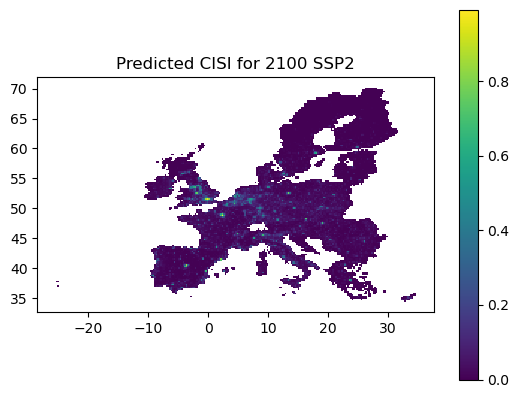

In [ ]:
# Plot the GeoDataFrame
cisi_index_pop.plot(column='total_pop_2100_SSP2_CISI_predictions', legend=True)
# Add a title
plt.title('Predicted CISI for 2100 SSP2')
# Show the plot
plt.show()

In [ ]:
#Function to predict the CISI index for all columns containing total_pop_2100
def predict_cisi_index(df,total_pop_year, res):
    """
    Predicts the CISI index for the year 2100 using the negative exponential function.

    Parameters:
    - df: pandas DataFrame, the input data
    - res: array-like, the optimal parameters for the negative exponential function

    Returns:
    - df: pandas DataFrame, the input data with the predicted CISI index for 2100
    """
    for col in df.columns:
        if total_pop_year in col:
            df[f'{col}_CISI_predictions'] = negative_exponential(df[col], *res)
    return df

# Apply the function to the cisi_index_pop DataFrame
cisi_index_pop = predict_cisi_index(cisi_index_pop,'total_pop_2030', res_trim)
cisi_index_pop = predict_cisi_index(cisi_index_pop,'total_pop_2050', res_trim)

cisi_index_pop.columns

Index(['CISI', 'Subscore_energy', 'Subscore_transportation', 'Subscore_water',
       'Subscore_waste', 'Subscore_telecommunication', 'Subscore_healthcare',
       'Subscore_education', 'geometry', 'total_pop_2010_SSP2_merkens',
       'total_pop_2010_SSP1', 'total_pop_2030_SSP1', 'total_pop_2030_SSP2',
       'total_pop_2030_SSP3', 'total_pop_2030_SSP4', 'total_pop_2030_SSP5',
       'total_pop_2050_SSP1', 'total_pop_2050_SSP2', 'total_pop_2050_SSP3',
       'total_pop_2050_SSP4', 'total_pop_2050_SSP5', 'total_pop_2100_SSP1',
       'total_pop_2100_SSP2', 'total_pop_2100_SSP3', 'total_pop_2100_SSP4',
       'total_pop_2100_SSP5', 'quantile_cisi',
       'total_pop_2100_SSP1_CISI_predictions',
       'total_pop_2100_SSP2_CISI_predictions',
       'total_pop_2100_SSP3_CISI_predictions',
       'total_pop_2100_SSP4_CISI_predictions',
       'total_pop_2100_SSP5_CISI_predictions',
       'total_pop_2030_SSP1_CISI_predictions',
       'total_pop_2030_SSP2_CISI_predictions',
       'total_p

In [ ]:
    # Create quantile bins based on 'CISI'
quantiles = pd.qcut(cisi_index_pop['CISI'], 8)
bins = quantiles.unique().categories.left.tolist() + [quantiles.unique().categories.right[-1]]
# Ensure bins are monotonically increasing
print(bins)

[-0.001, 0.00324, 0.0105, 0.0198, 0.031, 0.0439, 0.0626, 0.092, 1.0]


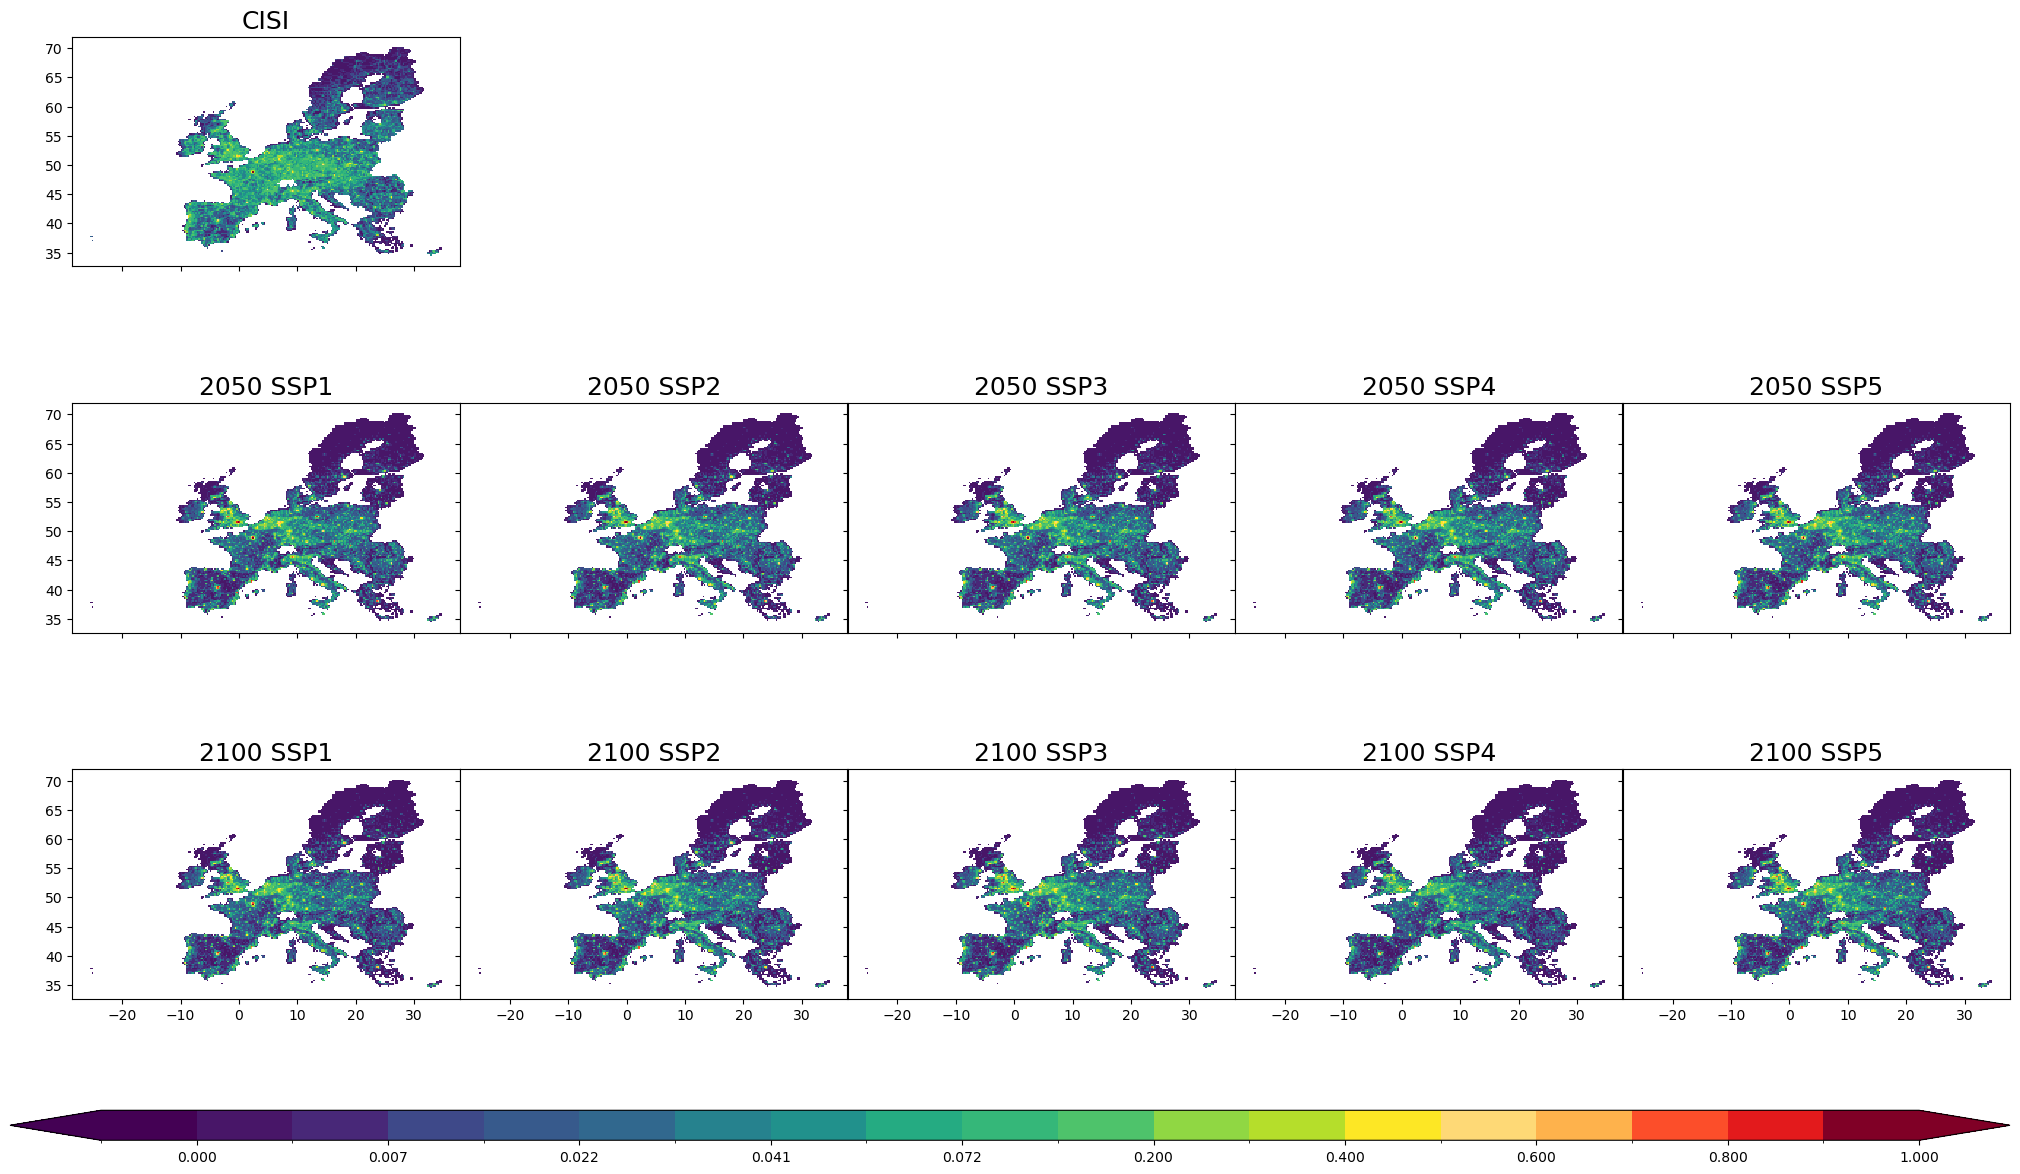

In [ ]:
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from matplotlib.colors import BoundaryNorm, ListedColormap
import matplotlib.cm as cm
import matplotlib.patches as mpatches


def plot_geodataframe_columns_by_year(geo_df, n_cols=5):
    """
    Create subplots for columns in a GeoDataFrame containing specified strings, organized by year.

    Parameters:
    geo_df (GeoDataFrame): The GeoDataFrame containing the data.
    search_strings (list): A list of strings to search for in the column names.
    years (list): A list of years to organize the rows.
    n_cols (int): Number of columns in the subplot grid.

    Returns:
    None
    """
    n_rows = 3  # Add one row for the CISI plot
    
    # Create subplots
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
    axs = axs.flatten()  # Flatten the array of axes for easy iteration

    bins = [-0.001, 0, 0.00205, 0.00736, 0.0142, 0.0217, 0.031, 0.0411, 0.0543, 0.0724, 0.103, 0.2, 0.3, 0.4 ,0.5 , 0.6 ,0.7 ,0.8 ,0.9, 1.0]
    # Create a custom colormap
    rgb_color1 = (128,0,38)
    rgba_color1 = tuple(c / 255.0 for c in rgb_color1) + (1.0,)
    rgb_color2 = (189,0,38)
    rgba_color2 = tuple(c / 255.0 for c in rgb_color2) + (1.0,)
    rgb_color3 = (227,26,28)
    rgba_color3 = tuple(c / 255.0 for c in rgb_color3) + (1.0,)
    rgb_color4 = (252,78,42)
    rgba_color4 = tuple(c / 255.0 for c in rgb_color4) + (1.0,)
    rgb_color5 = (253,141,60)
    rgba_color5 = tuple(c / 255.0 for c in rgb_color5) + (1.0,)
    rgb_color6 = (254,178,76)
    rgba_color6 = tuple(c / 255.0 for c in rgb_color6) + (1.0,)
    rgb_color7 = (254,217,118)
    rgba_color7 = tuple(c / 255.0 for c in rgb_color7) + (1.0,)
    
    viridis = plt.cm.viridis(np.linspace(0, 1, len(bins) - 1))
    colors = np.vstack((viridis,rgba_color7, rgba_color6, rgba_color5, rgba_color4, rgba_color3, rgba_color2, rgba_color1))  # Add grey color for zero values
    cmap = ListedColormap(colors)
    norm = BoundaryNorm(bins, ncolors=cmap.N, clip=True)

    # Plot the CISI column on the first row
    geo_df.plot(column='CISI', ax=axs[0], cmap=cmap, norm=norm)
    axs[0].set_title('CISI', fontsize=18)
    axs[0].set_xticklabels([])

    # Remove any empty subplots
    fig.delaxes(axs[1])
    fig.delaxes(axs[2])
    fig.delaxes(axs[3])
    fig.delaxes(axs[4])

    geo_df.plot(column='total_pop_2050_SSP1_CISI_predictions', ax=axs[5], cmap=cmap, norm=norm)
    geo_df.plot(column='total_pop_2050_SSP2_CISI_predictions', ax=axs[6], cmap=cmap, norm=norm)
    geo_df.plot(column='total_pop_2050_SSP3_CISI_predictions', ax=axs[7], cmap=cmap, norm=norm)
    geo_df.plot(column='total_pop_2050_SSP4_CISI_predictions', ax=axs[8], cmap=cmap, norm=norm)
    geo_df.plot(column='total_pop_2050_SSP5_CISI_predictions', ax=axs[9], cmap=cmap, norm=norm)
    geo_df.plot(column='total_pop_2100_SSP1_CISI_predictions', ax=axs[10], cmap=cmap, norm=norm)
    geo_df.plot(column='total_pop_2100_SSP2_CISI_predictions', ax=axs[11], cmap=cmap, norm=norm)
    geo_df.plot(column='total_pop_2100_SSP3_CISI_predictions', ax=axs[12], cmap=cmap, norm=norm)
    geo_df.plot(column='total_pop_2100_SSP4_CISI_predictions', ax=axs[13], cmap=cmap, norm=norm)
    geo_df.plot(column='total_pop_2100_SSP5_CISI_predictions', ax=axs[14], cmap=cmap, norm=norm)

    # Remove x-axis labels for all subplots except the last row
    axs[0].set_xticklabels([])
    axs[5].set_xticklabels([])
    axs[6].set_xticklabels([])
    axs[7].set_xticklabels([])
    axs[8].set_xticklabels([])
    axs[9].set_xticklabels([])
    
    # Remove y-axis labels for all subplots except the first column
    axs[6].set_yticklabels([])
    axs[7].set_yticklabels([])
    axs[8].set_yticklabels([])
    axs[9].set_yticklabels([])
    axs[11].set_yticklabels([])
    axs[12].set_yticklabels([])
    axs[13].set_yticklabels([])
    axs[14].set_yticklabels([])

    # Custom titles for the subplots
    axs[5].set_title("2050 SSP1", fontsize=18)
    axs[6].set_title("2050 SSP2", fontsize=18)
    axs[7].set_title("2050 SSP3", fontsize=18)
    axs[8].set_title("2050 SSP4", fontsize=18)
    axs[9].set_title("2050 SSP5", fontsize=18)
    axs[10].set_title("2100 SSP1", fontsize=18)
    axs[11].set_title("2100 SSP2", fontsize=18)
    axs[12].set_title("2100 SSP3", fontsize=18)
    axs[13].set_title("2100 SSP4", fontsize=18)
    axs[14].set_title("2100 SSP5", fontsize=18)
    
    # Define a mappable based on which the colorbar will be drawn
    mappable = cm.ScalarMappable(norm=norm, cmap=cmap)
    mappable.set_array([])

    # Define position and extent of colorbar
    cb_ax = fig.add_axes([0.1, 0.1, 0.8, 0.02])
    
    # Draw colorbar
    cbar = fig.colorbar(mappable, cax=cb_ax, orientation='horizontal', extend='both')
    
    # Adjust layout and show the plot
    plt.subplots_adjust(bottom=0.15, hspace=0.01, wspace=0.0015)  # Reduce space between plots

    plt.show()


# Plot the GeoDataFrame columns containing the search strings, organized by year
plot_geodataframe_columns_by_year(cisi_index_pop)

# Coastal masks

In [ ]:
len(cisi_index_pop)


10967

In [ ]:
import rasterio

# read tif raster
coastal_mask_pth = "data/coastal_mask/mask_europe.tif"
with rasterio.open(coastal_mask_pth) as src:
    # Read the raster data
    raster_data = src.read(1)
    transform = src.transform
    crs = src.crs
    print("CRS:", crs)

# # Plot the raster data
# plt.figure(figsize=(10, 10))
# plt.imshow(raster_data, cmap='gray')
# plt.title('Coastal Mask')
raster_data

CRS: EPSG:4326


array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       ...,
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],
      dtype=float32)

<Figure size 1000x1000 with 0 Axes>

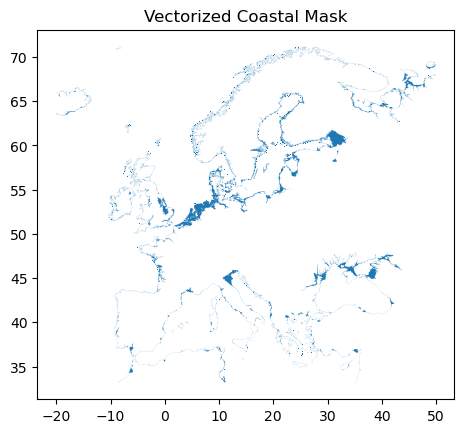

In [ ]:
from shapely.geometry import shape
from rasterio.features import shapes


# Vectorize the raster data
# mask value = 1 to create a binary mask
mask = raster_data == 1
shapes_generator = shapes(raster_data, mask=mask, transform=transform)

# Convert shapes to GeoDataFrame and save value in a column
geoms = []
values = []
for geom, value in shapes_generator:
    geoms.append(shape(geom))
    values.append(value)

gdf_coastal_mask = gpd.GeoDataFrame({'geometry': geoms, 'value': values}, crs=crs)


# Plot the vectorized data
plt.figure(figsize=(10, 10))
gdf_coastal_mask.plot()
plt.title('Vectorized Coastal Mask')
plt.show()

In [ ]:
gdf_coastal_mask.head(3)
gdf_coastal_mask["value"].unique()

array([1.])

## Overlap coastal mask

<Figure size 1000x1000 with 0 Axes>

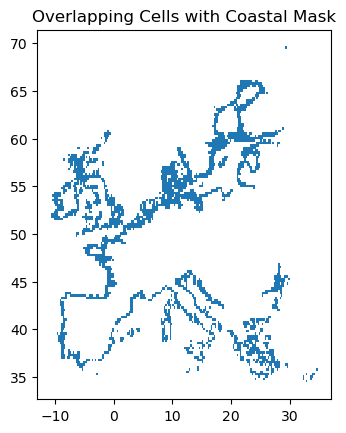

In [ ]:
# Assuming cisi_index_pop is already a GeoDataFrame with a geometry column
# Set the CRS for cisi_index_pop if not already set
if cisi_index_pop.crs is None:
    cisi_index_pop.set_crs("EPSG:4326", inplace=True)
# Ensure both GeoDataFrames have the same CRS
cisi_index_pop = cisi_index_pop.to_crs(gdf_coastal_mask.crs)

# Perform spatial join to find overlapping cells
gdf_cisi_index_pop_overlap_cm = gpd.sjoin(cisi_index_pop, gdf_coastal_mask, how="inner", predicate="contains")


# Plot the overlapping cells
plt.figure(figsize=(10, 10))
gdf_cisi_index_pop_overlap_cm.plot()
plt.title('Overlapping Cells with Coastal Mask')
plt.show()

In [ ]:
cisi_tree = shapely.STRtree(cisi_index_pop['geometry'])


In [ ]:
tree_overlay = cisi_tree.query(gdf_coastal_mask['geometry'].values,predicate='intersects')

In [ ]:
gdf_cisi_index_pop_overlap_cm_ek = cisi_index_pop.iloc[tree_overlay[1,:]]

In [ ]:
len(gdf_cisi_index_pop_overlap_cm_ek)

41002

In [ ]:
gdf_cisi_index_pop_overlap_cm_ek["geometry"] = gdf_cisi_index_pop_overlap_cm_ek.normalize()
gdf_cisi_index_pop_overlap_cm_ek = gdf_cisi_index_pop_overlap_cm_ek.drop_duplicates(subset='geometry')
len(gdf_cisi_index_pop_overlap_cm_ek)

/Users/joeldeplaen/opt/anaconda3/envs/future_cisi/lib/python3.12/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


3365

In [ ]:
# gdf_cisi_index_pop_overlap_cm.columns

In [ ]:
print(len(gdf_cisi_index_pop_overlap_cm))
#drop duplicates based on the index
#gdf_cisi_index_pop_overlap_cm = gdf_cisi_index_pop_overlap_cm.drop_duplicates(subset='index')
gdf_cisi_index_pop_overlap_cm["geometry"] = gdf_cisi_index_pop_overlap_cm.normalize()
gdf_cisi_index_pop_overlap_cm = gdf_cisi_index_pop_overlap_cm.drop_duplicates(subset='geometry')
print(len(gdf_cisi_index_pop_overlap_cm))

34941
2766


In [ ]:
gdf_cisi_index_pop_overlap_cm.columns
drop_cols = ['index_right', 'value']
gdf_cisi_index_pop_overlap_cm = gdf_cisi_index_pop_overlap_cm.drop(columns=drop_cols)

In [ ]:
# average cisi score for all cells
def calculate_cisi_averages(gdf):
    cisi_averages = {
        'cisi_avg': gdf['CISI'].mean(),
        'cisi_avg_2100_SSP1': gdf['total_pop_2100_SSP1_CISI_predictions'].mean(),
        'cisi_avg_2100_SSP2': gdf['total_pop_2100_SSP2_CISI_predictions'].mean(),
        'cisi_avg_2100_SSP3': gdf['total_pop_2100_SSP3_CISI_predictions'].mean(),
        'cisi_avg_2100_SSP4': gdf['total_pop_2100_SSP4_CISI_predictions'].mean(),
        'cisi_avg_2100_SSP5': gdf['total_pop_2100_SSP5_CISI_predictions'].mean(),
        'cisi_avg_2050_SSP1': gdf['total_pop_2050_SSP1_CISI_predictions'].mean(),
        'cisi_avg_2050_SSP2': gdf['total_pop_2050_SSP2_CISI_predictions'].mean(),
        'cisi_avg_2050_SSP3': gdf['total_pop_2050_SSP3_CISI_predictions'].mean(),
        'cisi_avg_2050_SSP4': gdf['total_pop_2050_SSP4_CISI_predictions'].mean(),
        'cisi_avg_2050_SSP5': gdf['total_pop_2050_SSP5_CISI_predictions'].mean(),
        'cisi_avg_2030_SSP1': gdf['total_pop_2030_SSP1_CISI_predictions'].mean(),
        'cisi_avg_2030_SSP2': gdf['total_pop_2030_SSP2_CISI_predictions'].mean(),
        'cisi_avg_2030_SSP3': gdf['total_pop_2030_SSP3_CISI_predictions'].mean(),
        'cisi_avg_2030_SSP4': gdf['total_pop_2030_SSP4_CISI_predictions'].mean(),
        'cisi_avg_2030_SSP5': gdf['total_pop_2030_SSP5_CISI_predictions'].mean()
    }
    return cisi_averages

cisi_averages_cm = calculate_cisi_averages(gdf_cisi_index_pop_overlap_cm)

def calculate_pop_averages(gdf):
    pop_averages = {
        'total_pop_2010_SSP1_avg': gdf['total_pop_2010_SSP1'].mean(),
        'total_pop_2100_SSP1_avg': gdf['total_pop_2100_SSP1'].mean(),
        'total_pop_2100_SSP2_avg': gdf['total_pop_2100_SSP2'].mean(),
        'total_pop_2100_SSP3_avg': gdf['total_pop_2100_SSP3'].mean(),
        'total_pop_2100_SSP4_avg': gdf['total_pop_2100_SSP4'].mean(),
        'total_pop_2100_SSP5_avg': gdf['total_pop_2100_SSP5'].mean(),
        'total_pop_2050_SSP1_avg': gdf['total_pop_2050_SSP1'].mean(),
        'total_pop_2050_SSP2_avg': gdf['total_pop_2050_SSP2'].mean(),
        'total_pop_2050_SSP3_avg': gdf['total_pop_2050_SSP3'].mean(),
        'total_pop_2050_SSP4_avg': gdf['total_pop_2050_SSP4'].mean(),
        'total_pop_2050_SSP5_avg': gdf['total_pop_2050_SSP5'].mean(),
        'total_pop_2030_SSP1_avg': gdf['total_pop_2030_SSP1'].mean(),
        'total_pop_2030_SSP2_avg': gdf['total_pop_2030_SSP2'].mean(),
        'total_pop_2030_SSP3_avg': gdf['total_pop_2030_SSP3'].mean(),
        'total_pop_2030_SSP4_avg': gdf['total_pop_2030_SSP4'].mean(),
        'total_pop_2030_SSP5_avg': gdf['total_pop_2030_SSP5'].mean()
    }
    return pop_averages

pop_averages_cm = calculate_pop_averages(gdf_cisi_index_pop_overlap_cm)
print(pop_averages_cm)

{'total_pop_2010_SSP1_avg': 63350.254108419365, 'total_pop_2100_SSP1_avg': 58818.79814453295, 'total_pop_2100_SSP2_avg': 65528.90903111217, 'total_pop_2100_SSP3_avg': 72047.06239540716, 'total_pop_2100_SSP4_avg': 49622.10614628651, 'total_pop_2100_SSP5_avg': 69914.60843723388, 'total_pop_2050_SSP1_avg': 67596.67957896719, 'total_pop_2050_SSP2_avg': 67151.6687547833, 'total_pop_2050_SSP3_avg': 65897.04459446979, 'total_pop_2050_SSP4_avg': 64195.500375890464, 'total_pop_2050_SSP5_avg': 72327.7653436934, 'total_pop_2030_SSP1_avg': 66317.50417270586, 'total_pop_2030_SSP2_avg': 66180.73757650226, 'total_pop_2030_SSP3_avg': 65712.11419597111, 'total_pop_2030_SSP4_avg': 65742.23868270525, 'total_pop_2030_SSP5_avg': 67517.39023417713}


In [ ]:
def calculate_avg_change_percentages(cisi_averages):
    cisi_avg = cisi_averages['cisi_avg']
    
    avg_change_percentages = {
        'avg_change_percentage_2100_SSP1': ((cisi_averages['cisi_avg_2100_SSP1'] - cisi_avg) / cisi_avg) * 100,
        'avg_change_percentage_2100_SSP2': ((cisi_averages['cisi_avg_2100_SSP2'] - cisi_avg) / cisi_avg) * 100,
        'avg_change_percentage_2100_SSP3': ((cisi_averages['cisi_avg_2100_SSP3'] - cisi_avg) / cisi_avg) * 100,
        'avg_change_percentage_2100_SSP4': ((cisi_averages['cisi_avg_2100_SSP4'] - cisi_avg) / cisi_avg) * 100,
        'avg_change_percentage_2100_SSP5': ((cisi_averages['cisi_avg_2100_SSP5'] - cisi_avg) / cisi_avg) * 100,
        'avg_change_percentage_2050_SSP1': ((cisi_averages['cisi_avg_2050_SSP1'] - cisi_avg) / cisi_avg) * 100,
        'avg_change_percentage_2050_SSP2': ((cisi_averages['cisi_avg_2050_SSP2'] - cisi_avg) / cisi_avg) * 100,
        'avg_change_percentage_2050_SSP3': ((cisi_averages['cisi_avg_2050_SSP3'] - cisi_avg) / cisi_avg) * 100,
        'avg_change_percentage_2050_SSP4': ((cisi_averages['cisi_avg_2050_SSP4'] - cisi_avg) / cisi_avg) * 100,
        'avg_change_percentage_2050_SSP5': ((cisi_averages['cisi_avg_2050_SSP5'] - cisi_avg) / cisi_avg) * 100,
        'avg_change_percentage_2030_SSP1': ((cisi_averages['cisi_avg_2030_SSP1'] - cisi_avg) / cisi_avg) * 100,
        'avg_change_percentage_2030_SSP2': ((cisi_averages['cisi_avg_2030_SSP2'] - cisi_avg) / cisi_avg) * 100,
        'avg_change_percentage_2030_SSP3': ((cisi_averages['cisi_avg_2030_SSP3'] - cisi_avg) / cisi_avg) * 100,
        'avg_change_percentage_2030_SSP4': ((cisi_averages['cisi_avg_2030_SSP4'] - cisi_avg) / cisi_avg) * 100,
        'avg_change_percentage_2030_SSP5': ((cisi_averages['cisi_avg_2030_SSP5'] - cisi_avg) / cisi_avg) * 100
    }
    
    return avg_change_percentages

avg_change_percentages_cm = calculate_avg_change_percentages(cisi_averages_cm)
print(avg_change_percentages_cm)

def calculate_avg_change_percentages_pop(pop_averages):
    pop_avg_2010 = pop_averages['total_pop_2010_SSP1_avg']
    
    avg_change_percentages = {
        'avg_change_percentage_2100_SSP1': ((pop_averages['total_pop_2100_SSP1_avg'] - pop_avg_2010) / pop_avg_2010) * 100,
        'avg_change_percentage_2100_SSP2': ((pop_averages['total_pop_2100_SSP2_avg'] - pop_avg_2010) / pop_avg_2010) * 100,
        'avg_change_percentage_2100_SSP3': ((pop_averages['total_pop_2100_SSP3_avg'] - pop_avg_2010) / pop_avg_2010) * 100,
        'avg_change_percentage_2100_SSP4': ((pop_averages['total_pop_2100_SSP4_avg'] - pop_avg_2010) / pop_avg_2010) * 100,
        'avg_change_percentage_2100_SSP5': ((pop_averages['total_pop_2100_SSP5_avg'] - pop_avg_2010) / pop_avg_2010) * 100,
        'avg_change_percentage_2050_SSP1': ((pop_averages['total_pop_2050_SSP1_avg'] - pop_avg_2010) / pop_avg_2010) * 100,
        'avg_change_percentage_2050_SSP2': ((pop_averages['total_pop_2050_SSP2_avg'] - pop_avg_2010) / pop_avg_2010) * 100,
        'avg_change_percentage_2050_SSP3': ((pop_averages['total_pop_2050_SSP3_avg'] - pop_avg_2010) / pop_avg_2010) * 100,
        'avg_change_percentage_2050_SSP4': ((pop_averages['total_pop_2050_SSP4_avg'] - pop_avg_2010) / pop_avg_2010) * 100,
        'avg_change_percentage_2050_SSP5': ((pop_averages['total_pop_2050_SSP5_avg'] - pop_avg_2010) / pop_avg_2010) * 100,
        'avg_change_percentage_2030_SSP1': ((pop_averages['total_pop_2030_SSP1_avg'] - pop_avg_2010) / pop_avg_2010) * 100,
        'avg_change_percentage_2030_SSP2': ((pop_averages['total_pop_2030_SSP2_avg'] - pop_avg_2010) / pop_avg_2010) * 100,
        'avg_change_percentage_2030_SSP3': ((pop_averages['total_pop_2030_SSP3_avg'] - pop_avg_2010) / pop_avg_2010) * 100,
        'avg_change_percentage_2030_SSP4': ((pop_averages['total_pop_2030_SSP4_avg'] - pop_avg_2010) / pop_avg_2010) * 100,
        'avg_change_percentage_2030_SSP5': ((pop_averages['total_pop_2030_SSP5_avg'] - pop_avg_2010) / pop_avg_2010) * 100
    }
    
    return avg_change_percentages

avg_change_percentages_pop_cm = calculate_avg_change_percentages_pop(pop_averages_cm)
print(avg_change_percentages_pop_cm)




{'avg_change_percentage_2100_SSP1': -18.70005519940706, 'avg_change_percentage_2100_SSP2': -10.545689975171028, 'avg_change_percentage_2100_SSP3': -3.094116163527889, 'avg_change_percentage_2100_SSP4': -29.206063885419443, 'avg_change_percentage_2100_SSP5': -6.088425036492205, 'avg_change_percentage_2050_SSP1': -7.758244695150564, 'avg_change_percentage_2050_SSP2': -8.231854097217163, 'avg_change_percentage_2050_SSP3': -9.526875370827215, 'avg_change_percentage_2050_SSP4': -11.5984422121988, 'avg_change_percentage_2050_SSP5': -2.538729006914246, 'avg_change_percentage_2030_SSP1': -9.012241537640229, 'avg_change_percentage_2030_SSP2': -9.15842530229504, 'avg_change_percentage_2030_SSP3': -9.640228930511174, 'avg_change_percentage_2030_SSP4': -9.655612779970085, 'avg_change_percentage_2030_SSP5': -7.6820456392274945}
{'avg_change_percentage_2100_SSP1': -7.153019396151368, 'avg_change_percentage_2100_SSP2': 3.439062642060115, 'avg_change_percentage_2100_SSP3': 13.728134810799403, 'avg_cha

In [ ]:
# Define the desired order of the keys
desired_order = [
    
    'avg_change_percentage_2030_SSP1', 'avg_change_percentage_2030_SSP2', 'avg_change_percentage_2030_SSP3', 
    'avg_change_percentage_2030_SSP4', 'avg_change_percentage_2030_SSP5', 'avg_change_percentage_2050_SSP1', 
    'avg_change_percentage_2050_SSP2', 'avg_change_percentage_2050_SSP3', 'avg_change_percentage_2050_SSP4', 
    'avg_change_percentage_2050_SSP5', 'avg_change_percentage_2100_SSP1', 'avg_change_percentage_2100_SSP2', 
    'avg_change_percentage_2100_SSP3', 'avg_change_percentage_2100_SSP4', 'avg_change_percentage_2100_SSP5'
]
# Reorder the data
ordered_keys = [key for key in desired_order if key in avg_change_percentages_cm]
ordered_values = [avg_change_percentages_cm[key] for key in ordered_keys]

ordered_keys_pop = [key for key in desired_order if key in avg_change_percentages_pop_cm]
ordered_values_pop = [avg_change_percentages_pop_cm[key] for key in ordered_keys_pop]

In [ ]:
ordered_keys

['avg_change_percentage_2030_SSP1',
 'avg_change_percentage_2030_SSP2',
 'avg_change_percentage_2030_SSP3',
 'avg_change_percentage_2030_SSP4',
 'avg_change_percentage_2030_SSP5',
 'avg_change_percentage_2050_SSP1',
 'avg_change_percentage_2050_SSP2',
 'avg_change_percentage_2050_SSP3',
 'avg_change_percentage_2050_SSP4',
 'avg_change_percentage_2050_SSP5',
 'avg_change_percentage_2100_SSP1',
 'avg_change_percentage_2100_SSP2',
 'avg_change_percentage_2100_SSP3',
 'avg_change_percentage_2100_SSP4',
 'avg_change_percentage_2100_SSP5']

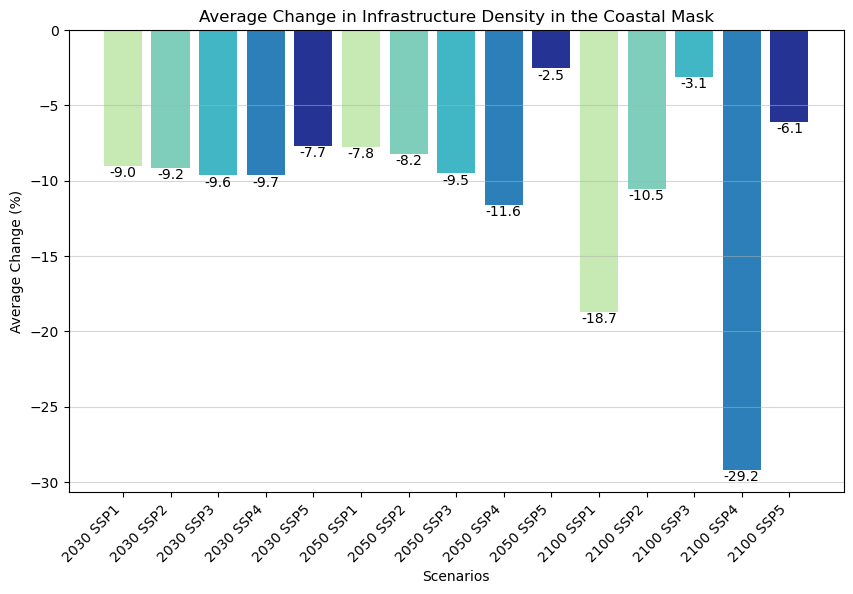

In [ ]:
# plot bar of the average change percentages

plt.figure(figsize=(10, 6))
# Define individual colors for each bar
colors = [
    '#c7e9b4', '#7fcdbb', '#41b6c4', '#2c7fb8', '#253494',
    '#c7e9b4', '#7fcdbb', '#41b6c4', '#2c7fb8', '#253494', 
    '#c7e9b4', '#7fcdbb', '#41b6c4', '#2c7fb8', '#253494'
]
plt.bar(ordered_keys, ordered_values, color=colors)
plt.title('Average Change in Infrastructure Density in the Coastal Mask')
plt.ylabel('Average Change (%)')
plt.xlabel('Scenarios')
# Define custom x-tick labels
custom_xtick_labels = [
    '2030 SSP1', '2030 SSP2', '2030 SSP3', '2030 SSP4', '2030 SSP5', 
    '2050 SSP1', '2050 SSP2', '2050 SSP3', '2050 SSP4', '2050 SSP5', 
    '2100 SSP1', '2100 SSP2', '2100 SSP3', '2100 SSP4', '2100 SSP5'
]
plt.xticks(ticks=range(len(ordered_keys)), labels=custom_xtick_labels, rotation=45, ha='right')
plt.grid(axis='y', alpha=0.50)
plt.xticks(rotation=45, ha='right')
# Add value on top of each bar
for i, v in enumerate(ordered_values):
    if v < 0:
        plt.text(i, v - 0.01, f"{v:.1f}", ha='center', va='top')
    else:
        plt.text(i, v + 0.01, f"{v:.1f}", ha='center', va='bottom')
plt.show()

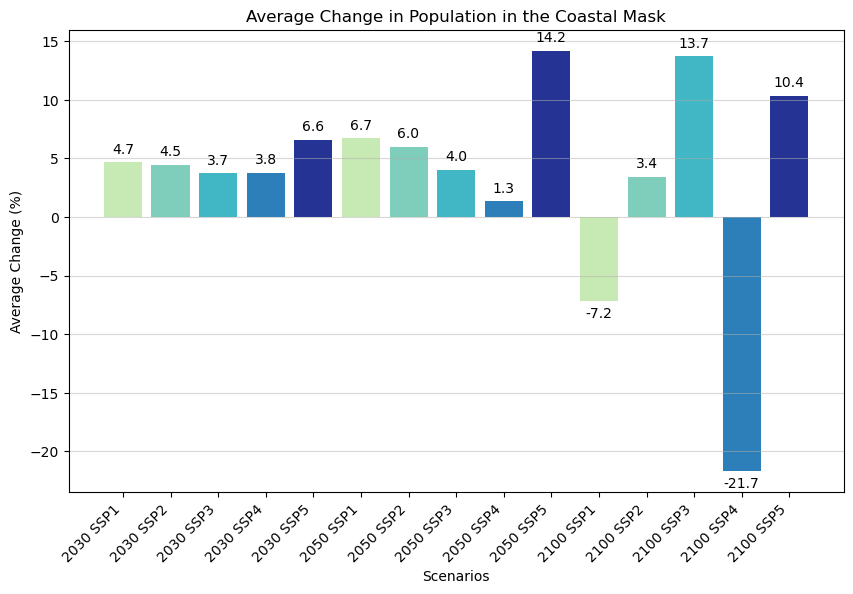

In [ ]:
# plot bar of the average change percentages Population

plt.figure(figsize=(10, 6))
# Define individual colors for each bar
colors = [
    '#c7e9b4', '#7fcdbb', '#41b6c4', '#2c7fb8', '#253494',
    '#c7e9b4', '#7fcdbb', '#41b6c4', '#2c7fb8', '#253494', 
    '#c7e9b4', '#7fcdbb', '#41b6c4', '#2c7fb8', '#253494'
]
plt.bar(ordered_keys_pop, ordered_values_pop, color=colors)
plt.title('Average Change in Population in the Coastal Mask')
plt.ylabel('Average Change (%)')
plt.xlabel('Scenarios')
# Define custom x-tick labels
custom_xtick_labels = [
    '2030 SSP1', '2030 SSP2', '2030 SSP3', '2030 SSP4', '2030 SSP5', 
    '2050 SSP1', '2050 SSP2', '2050 SSP3', '2050 SSP4', '2050 SSP5', 
    '2100 SSP1', '2100 SSP2', '2100 SSP3', '2100 SSP4', '2100 SSP5'
]
plt.xticks(ticks=range(len(ordered_keys_pop)), labels=custom_xtick_labels, rotation=45, ha='right')
plt.grid(axis='y', alpha=0.50)
plt.xticks(rotation=45, ha='right')
# Add value on top of each bar
for i, v in enumerate(ordered_values_pop):
        if v > 0:
            plt.text(i, v + 0.5, f"{v:.1f}", ha='center', va='bottom')
        else:
            plt.text(i, v - 0.5, f"{v:.1f}", ha='center', va='top')
plt.show()

# Urban fabric

In [ ]:
print(len(cisi_index_pop))
print(len(gdf_cisi_index_pop_overlap_cm))

10967
2766


In [ ]:
# read tif raster
corine_pth = "data/corine/corine_land_class_2018/DATA/U2018_CLC2018_V2020_20u1.tif"
try:
    with rasterio.open(corine_pth) as src_uf:
        # Read the raster data into a numpy array
        raster_data_uf = src_uf.read(1)  # Read the first band

        # Get the transform and CRS (Coordinate Reference System)
        transform_uf = src_uf.transform
        crs_uf = src_uf.crs

        # Debugging: Print the metadata of the raster file
        print("Raster file metadata:")
        print(src_uf.meta)

#         # Debugging: Print the unique values in the raster data
#         unique_values = np.unique(raster_data_uf)
#         print("Unique values in the raster data:")
#         print(unique_values)

#         # Convert raster data to uint8
#         raster_data_uint8 = raster_data_uf.astype(np.uint8)

except rasterio.errors.RasterioIOError:
    print(f"Error: Unable to open the raster file at {coastal_mask_pth}")

# convert crs to epsg 4326


Raster file metadata:
{'driver': 'GTiff', 'dtype': 'int8', 'nodata': -128.0, 'width': 65000, 'height': 46000, 'count': 1, 'crs': CRS.from_wkt('PROJCS["ETRS89-extended / LAEA Europe",GEOGCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6258"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4258"]],PROJECTION["Lambert_Azimuthal_Equal_Area"],PARAMETER["latitude_of_center",52],PARAMETER["longitude_of_center",10],PARAMETER["false_easting",4321000],PARAMETER["false_northing",3210000],UNIT["metre",1],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3035"]]'), 'transform': Affine(100.0, 0.0, 900000.0,
       0.0, -100.0, 5500000.0)}


In [ ]:
raster_data_uf

array([[-128, -128, -128, ..., -128, -128, -128],
       [-128, -128, -128, ..., -128, -128, -128],
       [-128, -128, -128, ..., -128, -128, -128],
       ...,
       [-128, -128, -128, ..., -128, -128, -128],
       [-128, -128, -128, ..., -128, -128, -128],
       [-128, -128, -128, ..., -128, -128, -128]], dtype=int8)

In [ ]:
# Convert raster data to uint8
raster_data_uint8 = raster_data_uf.astype(np.uint8)

<Figure size 1000x1000 with 0 Axes>

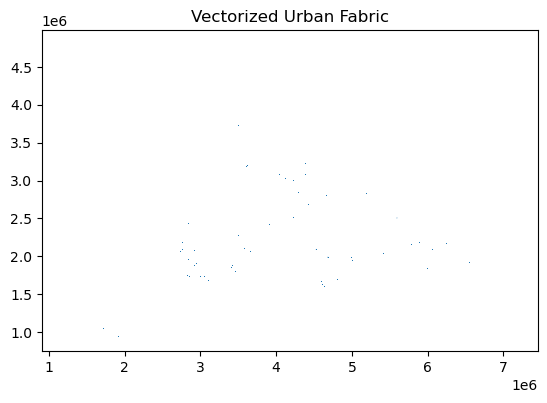

In [ ]:

# Vectorize the raster data
# mask value = 1 to create a binary mask
mask_uf = raster_data_uint8 == 1
shapes_generator_uf = shapes(raster_data_uint8, mask=mask_uf, transform=transform_uf)

# Convert shapes to GeoDataFrame and save value in a column
geoms = []
values = []
for geom, value in shapes_generator_uf:
    geoms.append(shape(geom))
    values.append(value)

gdf_urban_fabric = gpd.GeoDataFrame({'geometry': geoms, 'value': values}, crs=crs_uf)


# Plot the vectorized data
plt.figure(figsize=(10, 10))
gdf_urban_fabric.plot()
plt.title('Vectorized Urban Fabric')
plt.show()

<Figure size 1000x1000 with 0 Axes>

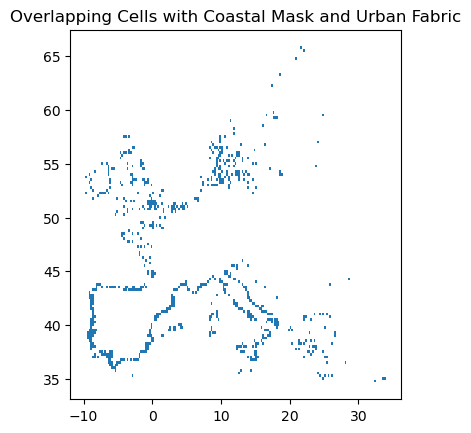

In [ ]:
# reproject urban fabric to cisi index pop crs
gdf_urban_fabric = gdf_urban_fabric.to_crs(gdf_cisi_index_pop_overlap_cm.crs)
# Perform spatial join to find overlapping cells
gdf_cisi_index_pop_overlap_cm_uf = gpd.sjoin(gdf_cisi_index_pop_overlap_cm, gdf_urban_fabric, how="inner", predicate="covers")

# Plot the overlapping cells
plt.figure(figsize=(10, 10))
gdf_cisi_index_pop_overlap_cm_uf.plot()
plt.title('Overlapping Cells with Coastal Mask and Urban Fabric')
plt.show()

In [ ]:
print (len(gdf_cisi_index_pop_overlap_cm_uf))
gdf_cisi_index_pop_overlap_cm_uf["geometry"] = gdf_cisi_index_pop_overlap_cm_uf.normalize()
gdf_cisi_index_pop_overlap_cm_uf = gdf_cisi_index_pop_overlap_cm_uf.drop_duplicates(subset='geometry')
print(len(gdf_cisi_index_pop_overlap_cm_uf))

3133
733


In [ ]:
gdf_cisi_index_pop_overlap_cm_uf.columns

Index(['CISI', 'Subscore_energy', 'Subscore_transportation', 'Subscore_water',
       'Subscore_waste', 'Subscore_telecommunication', 'Subscore_healthcare',
       'Subscore_education', 'geometry', 'total_pop_2010_SSP2_merkens',
       'total_pop_2010_SSP1', 'total_pop_2030_SSP1', 'total_pop_2030_SSP2',
       'total_pop_2030_SSP3', 'total_pop_2030_SSP4', 'total_pop_2030_SSP5',
       'total_pop_2050_SSP1', 'total_pop_2050_SSP2', 'total_pop_2050_SSP3',
       'total_pop_2050_SSP4', 'total_pop_2050_SSP5', 'total_pop_2100_SSP1',
       'total_pop_2100_SSP2', 'total_pop_2100_SSP3', 'total_pop_2100_SSP4',
       'total_pop_2100_SSP5', 'quantile_cisi',
       'total_pop_2100_SSP1_CISI_predictions',
       'total_pop_2100_SSP2_CISI_predictions',
       'total_pop_2100_SSP3_CISI_predictions',
       'total_pop_2100_SSP4_CISI_predictions',
       'total_pop_2100_SSP5_CISI_predictions',
       'total_pop_2030_SSP1_CISI_predictions',
       'total_pop_2030_SSP2_CISI_predictions',
       'total_p

In [ ]:
gdf_cisi_index_pop_overlap_cm_uf["geometry"] = gdf_cisi_index_pop_overlap_cm_uf["geometry"].apply(lambda geom: geom.normalize() if geom else geom)
gdf_cisi_index_pop_overlap_cm_uf = gdf_cisi_index_pop_overlap_cm_uf.drop_duplicates(subset='geometry')

# drop columns
# drop_cols = ['index_right', 'value']
# gdf_cisi_index_pop_overlap_cm_uf = gdf_cisi_index_pop_overlap_cm_uf.drop(columns=drop_cols)
# gdf_cisi_index_pop_overlap_cm_uf


/Users/joeldeplaen/opt/anaconda3/envs/future_cisi/lib/python3.12/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
cisi_averages_cm_uf = calculate_cisi_averages(gdf_cisi_index_pop_overlap_cm_uf)
pop_averages_cm_uf = calculate_pop_averages(gdf_cisi_index_pop_overlap_cm_uf)
print(cisi_averages_cm_uf)
print(pop_averages_cm_uf)


{'cisi_avg': 0.08953669710642212, 'cisi_avg_2100_SSP1': 0.09675481879870253, 'cisi_avg_2100_SSP2': 0.1053910167139531, 'cisi_avg_2100_SSP3': 0.11276315270758093, 'cisi_avg_2100_SSP4': 0.08396230700464873, 'cisi_avg_2100_SSP5': 0.1127542196939769, 'cisi_avg_2050_SSP1': 0.10961039247896463, 'cisi_avg_2050_SSP2': 0.10891862658661963, 'cisi_avg_2050_SSP3': 0.1068496511889383, 'cisi_avg_2050_SSP4': 0.10504775393881838, 'cisi_avg_2050_SSP5': 0.11637741199357986, 'cisi_avg_2030_SSP1': 0.10800016564899385, 'cisi_avg_2030_SSP2': 0.10780537742151264, 'cisi_avg_2030_SSP3': 0.10709562473883658, 'cisi_avg_2030_SSP4': 0.10723953538888767, 'cisi_avg_2030_SSP5': 0.10976299270989517}
{'total_pop_2010_SSP1_avg': 161354.9652833197, 'total_pop_2100_SSP1_avg': 150067.1492856118, 'total_pop_2100_SSP2_avg': 166189.46398131616, 'total_pop_2100_SSP3_avg': 181386.62059165674, 'total_pop_2100_SSP4_avg': 124762.06375351056, 'total_pop_2100_SSP5_avg': 181387.9275959634, 'total_pop_2050_SSP1_avg': 172835.9294548086

In [ ]:
avg_change_percentages_cm_uf = calculate_avg_change_percentages(cisi_averages_cm_uf)
avg_change_percentages_pop_cm_uf = calculate_avg_change_percentages_pop(pop_averages_cm_uf)

print(avg_change_percentages_cm_uf)
print(avg_change_percentages_pop_cm_uf)

{'avg_change_percentage_2100_SSP1': 8.06163497822691, 'avg_change_percentage_2100_SSP2': 17.707063271148748, 'avg_change_percentage_2100_SSP3': 25.940710738472024, 'avg_change_percentage_2100_SSP4': -6.225816097669705, 'avg_change_percentage_2100_SSP5': 25.93073380846152, 'avg_change_percentage_2050_SSP1': 22.41951738367475, 'avg_change_percentage_2050_SSP2': 21.646911385574576, 'avg_change_percentage_2050_SSP3': 19.33615449533305, 'avg_change_percentage_2050_SSP4': 17.32368663762527, 'avg_change_percentage_2050_SSP5': 29.977334159707976, 'avg_change_percentage_2030_SSP1': 20.62111864661068, 'avg_change_percentage_2030_SSP2': 20.40356737012156, 'avg_change_percentage_2030_SSP3': 19.610872636438835, 'avg_change_percentage_2030_SSP4': 19.771600756530244, 'avg_change_percentage_2030_SSP5': 22.58995055338299}
{'avg_change_percentage_2100_SSP1': -6.995642171833917, 'avg_change_percentage_2100_SSP2': 2.9961883661328104, 'avg_change_percentage_2100_SSP3': 12.414650688414754, 'avg_change_perce

In [ ]:
# Reorder the data
ordered_keys = [key for key in desired_order if key in avg_change_percentages_cm_uf]
ordered_values = [avg_change_percentages_cm_uf[key] for key in ordered_keys]

ordered_keys_pop = [key for key in desired_order if key in avg_change_percentages_pop_cm]
ordered_values_pop = [avg_change_percentages_pop_cm[key] for key in ordered_keys_pop]

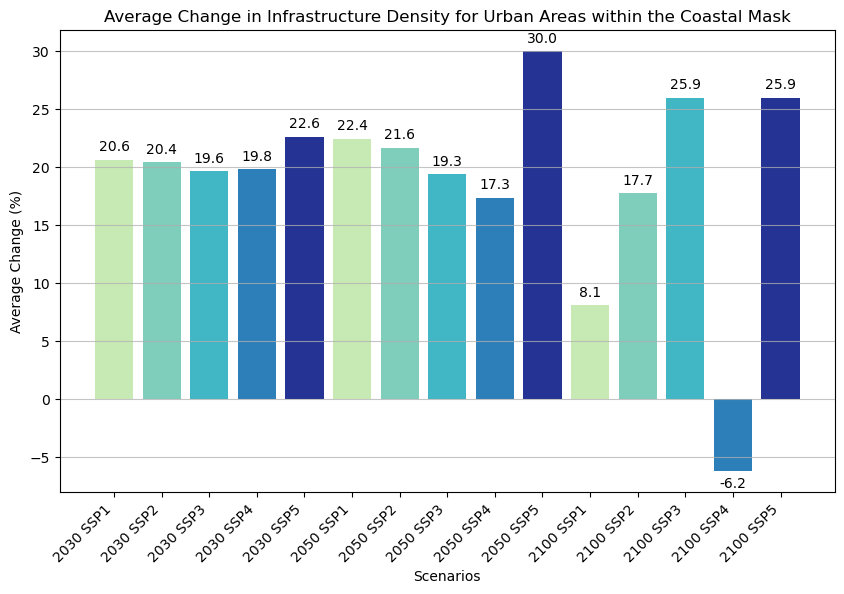

In [ ]:
# plot bar of the average change percentages
plt.figure(figsize=(10, 6))
# Define individual colors for each bar
colors = [
    '#c7e9b4', '#7fcdbb', '#41b6c4', '#2c7fb8', '#253494',
    '#c7e9b4', '#7fcdbb', '#41b6c4', '#2c7fb8', '#253494', 
    '#c7e9b4', '#7fcdbb', '#41b6c4', '#2c7fb8', '#253494'
]
plt.bar(ordered_keys, ordered_values, color=colors)
plt.title('Average Change in Infrastructure Density for Urban Areas within the Coastal Mask')
plt.ylabel('Average Change (%)')
plt.xlabel('Scenarios')
# specify space between bar plots

# Define custom x-tick labels
custom_xtick_labels = [
    '2030 SSP1', '2030 SSP2', '2030 SSP3', '2030 SSP4', '2030 SSP5', 
    '2050 SSP1', '2050 SSP2', '2050 SSP3', '2050 SSP4', '2050 SSP5', 
    '2100 SSP1', '2100 SSP2', '2100 SSP3', '2100 SSP4', '2100 SSP5'
]
plt.xticks(ticks=range(len(ordered_keys)), labels=custom_xtick_labels, rotation=45, ha='right')
# Add y-axis grid with lines every 5%
plt.grid(axis='y', alpha=0.75)
# Add value on top of each bar
for i, v in enumerate(ordered_values):
        if v > 0:
            plt.text(i, v + 0.5, f"{v:.1f}", ha='center', va='bottom')
        else:
            plt.text(i, v - 0.5, f"{v:.1f}", ha='center', va='top')
plt.show()

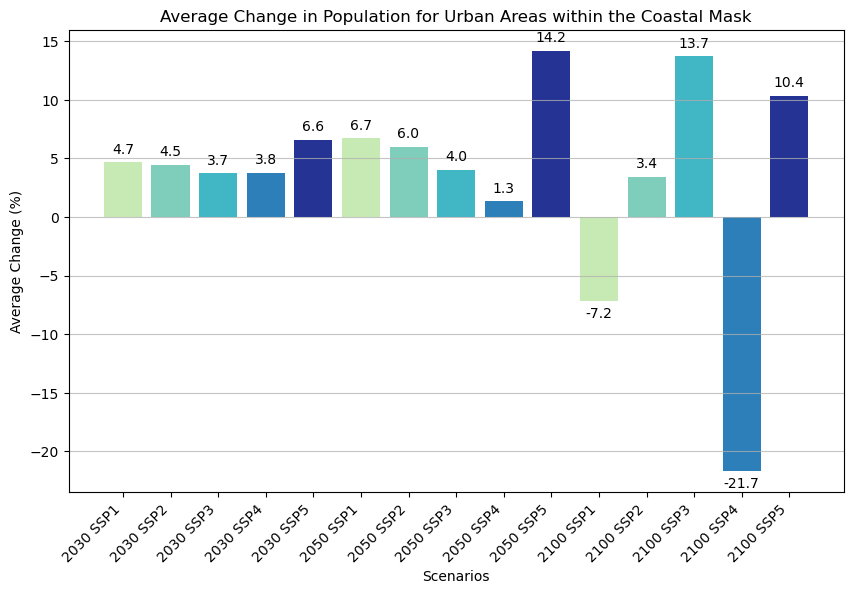

In [ ]:
# plot bar of the average change percentages
plt.figure(figsize=(10, 6))
# Define individual colors for each bar
colors = [
    '#c7e9b4', '#7fcdbb', '#41b6c4', '#2c7fb8', '#253494',
    '#c7e9b4', '#7fcdbb', '#41b6c4', '#2c7fb8', '#253494', 
    '#c7e9b4', '#7fcdbb', '#41b6c4', '#2c7fb8', '#253494'
]
plt.bar(ordered_keys_pop, ordered_values_pop, color=colors)
plt.title('Average Change in Population for Urban Areas within the Coastal Mask')
plt.ylabel('Average Change (%)')
plt.xlabel('Scenarios')
# specify space between bar plots

# Define custom x-tick labels
custom_xtick_labels = [
    '2030 SSP1', '2030 SSP2', '2030 SSP3', '2030 SSP4', '2030 SSP5', 
    '2050 SSP1', '2050 SSP2', '2050 SSP3', '2050 SSP4', '2050 SSP5', 
    '2100 SSP1', '2100 SSP2', '2100 SSP3', '2100 SSP4', '2100 SSP5'
]
plt.xticks(ticks=range(len(ordered_keys_pop)), labels=custom_xtick_labels, rotation=45, ha='right')
# Add y-axis grid with lines every 5%
plt.grid(axis='y', alpha=0.75)
# Add value on top of each bar
for i, v in enumerate(ordered_values_pop):
    if v > 0:
        plt.text(i, v + 0.5, f"{v:.1f}", ha='center', va='bottom')
    else:
        plt.text(i, v - 0.5, f"{v:.1f}", ha='center', va='top')
plt.show()

# Country metrics

In [ ]:
# load gpd of Germany form natural earth data
gdf_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# load all individual geodataframe for all EU countries from natural earth data
gdf_eu = gdf_world[gdf_world['continent'] == 'Europe']
gdf_germany = gdf_eu[gdf_eu['name'] == 'Germany']
gdf_france = gdf_eu[gdf_eu['name'] == 'France']
gdf_italy = gdf_eu[gdf_eu['name'] == 'Italy']
gdf_spain = gdf_eu[gdf_eu['name'] == 'Spain']
gdf_belgium = gdf_eu[gdf_eu['name'] == 'Belgium']
gdf_netherlands = gdf_eu[gdf_eu['name'] == 'Netherlands']
gdf_denmark = gdf_eu[gdf_eu['name'] == 'Denmark']
gdf_poland = gdf_eu[gdf_eu['name'] == 'Poland']
gdf_croatia = gdf_eu[gdf_eu['name'] == 'Croatia']
gdf_slovenia = gdf_eu[gdf_eu['name'] == 'Slovenia']
gdf_latvia = gdf_eu[gdf_eu['name'] == 'Latvia']
gdf_lithuania = gdf_eu[gdf_eu['name'] == 'Lithuania']
gdf_estonia = gdf_eu[gdf_eu['name'] == 'Estonia']
gdf_finland = gdf_eu[gdf_eu['name'] == 'Finland']
gdf_sweden = gdf_eu[gdf_eu['name'] == 'Sweden']
gdf_portugal = gdf_eu[gdf_eu['name'] == 'Portugal']
gdf_greece = gdf_eu[gdf_eu['name'] == 'Greece']
gdf_cyprus = gdf_eu[gdf_eu['name'] == 'Cyprus']
gdf_malta = gdf_eu[gdf_eu['name'] == 'Malta']
gdf_uk = gdf_eu[gdf_eu['name'] == 'United Kingdom']

/var/folders/0n/dhghwnr10818sldm15nkjl4r0000gn/T/ipykernel_65356/2631489456.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gdf_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [ ]:
def country_metrics(gdf_cisi_index_pop_overlap_cm_uf, gdf_country):
    """
    Reproject urban fabric to the CRS of the CISI index population overlap,
    perform a spatial join to find overlapping cells, and plot the overlapping cells.

    Parameters:
    gdf_cisi_index_pop_overlap_cm (GeoDataFrame): GeoDataFrame containing the CISI index population overlap.
    gdf_urban_fabric (GeoDataFrame): GeoDataFrame containing the urban fabric data.

    Returns:
    None
    """
    # Reproject urban fabric to CISI index pop CRS
    gdf_country = gdf_country.to_crs(gdf_cisi_index_pop_overlap_cm.crs)
    
    # Perform spatial join to find overlapping cells
    gdf_country_cisi = gpd.sjoin(gdf_cisi_index_pop_overlap_cm_uf, gdf_country, how="inner", predicate="intersects")
    
    if len(gdf_country_cisi) > 0:
        print(f" overlapping cells found for {gdf_country['name'].values[0]}")
            # Plot the overlapping cells
        plt.figure(figsize=(10, 10))
        gdf_country_cisi.plot()
        plt.title('Overlapping Cells with Coastal Mask and Urban Fabric')
        plt.show()
        cisi_averages_country = calculate_cisi_averages(gdf_country_cisi)
        avg_change_percentages_country = calculate_avg_change_percentages(cisi_averages_country)
        return avg_change_percentages_country
    else:
        print(f"No overlapping cells found for {gdf_country['name'].values[0]}")
        return None

In [ ]:
# drop columns
drop_cols = ['index_right', 'value']
gdf_cisi_index_pop_overlap_cm_uf = gdf_cisi_index_pop_overlap_cm_uf.drop(columns=drop_cols)

 overlapping cells found for Belgium


<Figure size 1000x1000 with 0 Axes>

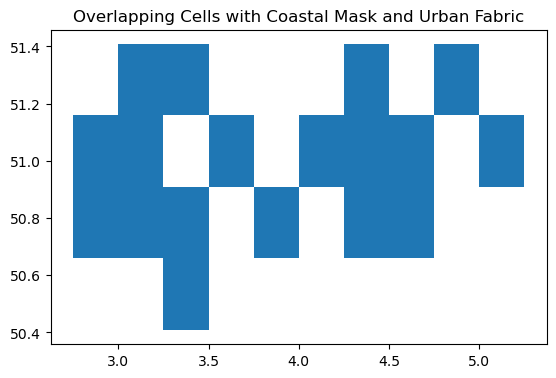

 overlapping cells found for France


<Figure size 1000x1000 with 0 Axes>

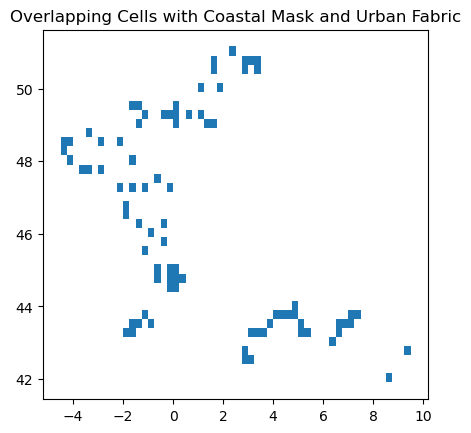

 overlapping cells found for Italy


<Figure size 1000x1000 with 0 Axes>

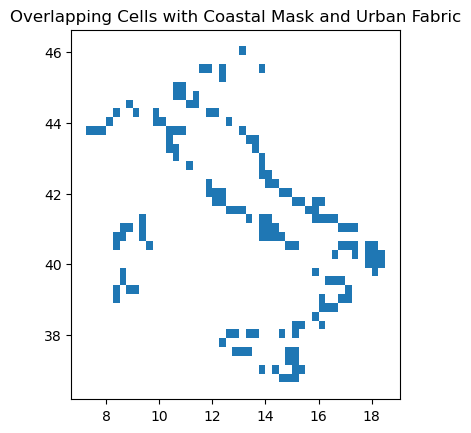

 overlapping cells found for Spain


<Figure size 1000x1000 with 0 Axes>

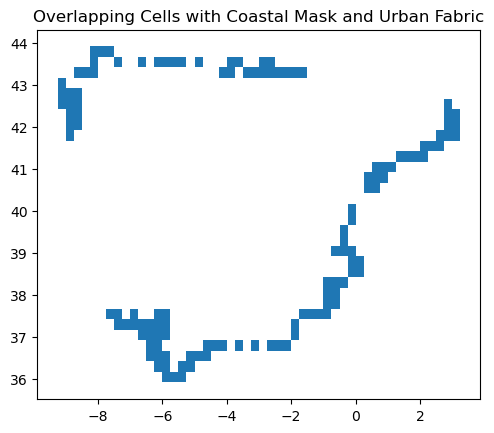

 overlapping cells found for Netherlands


<Figure size 1000x1000 with 0 Axes>

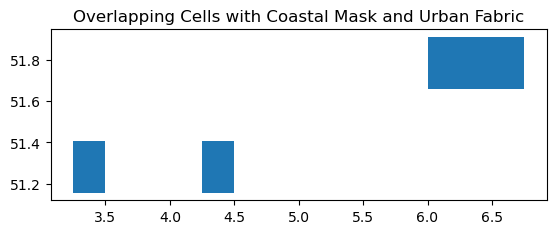

 overlapping cells found for Denmark


<Figure size 1000x1000 with 0 Axes>

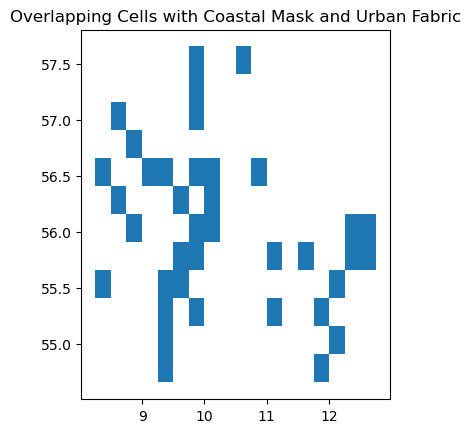

 overlapping cells found for Poland


<Figure size 1000x1000 with 0 Axes>

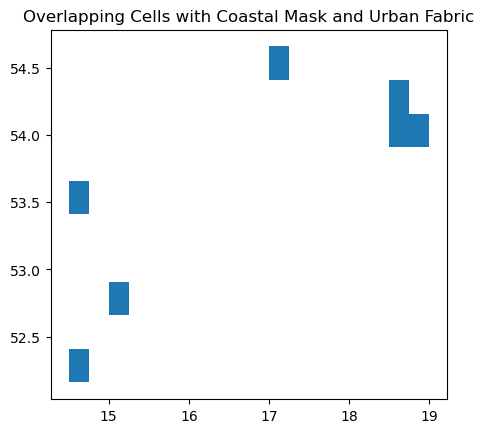

 overlapping cells found for Croatia


<Figure size 1000x1000 with 0 Axes>

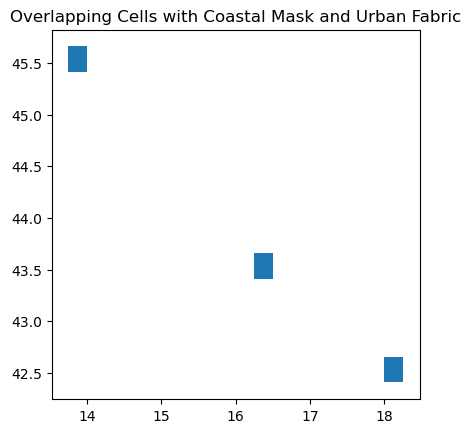

 overlapping cells found for Slovenia


<Figure size 1000x1000 with 0 Axes>

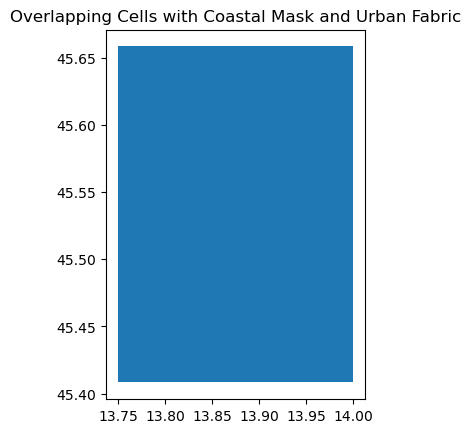

 overlapping cells found for Latvia


<Figure size 1000x1000 with 0 Axes>

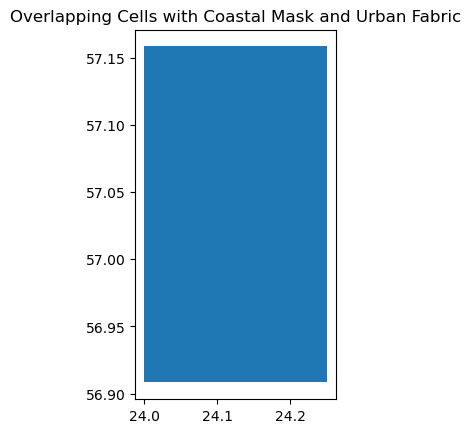

 overlapping cells found for Lithuania


<Figure size 1000x1000 with 0 Axes>

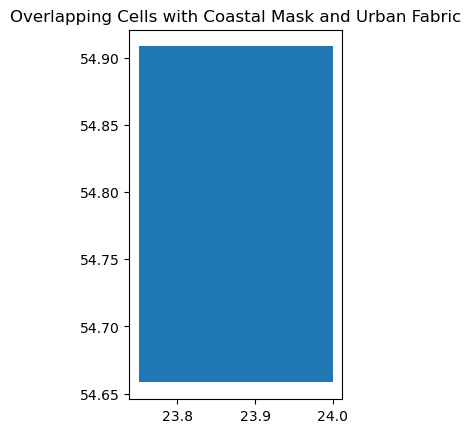

 overlapping cells found for Estonia


<Figure size 1000x1000 with 0 Axes>

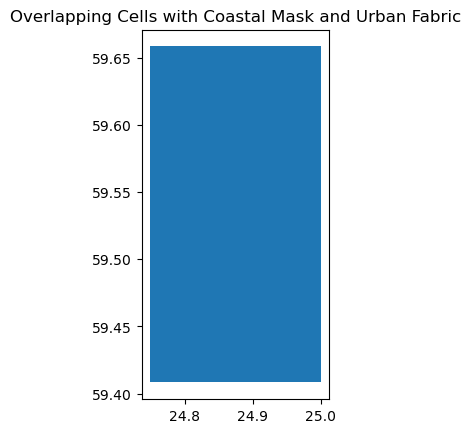

No overlapping cells found for Finland
 overlapping cells found for Sweden


<Figure size 1000x1000 with 0 Axes>

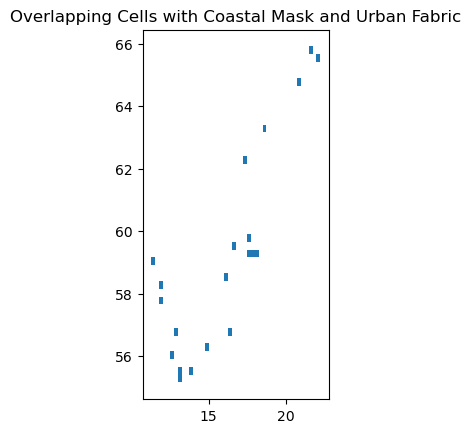

 overlapping cells found for Portugal


<Figure size 1000x1000 with 0 Axes>

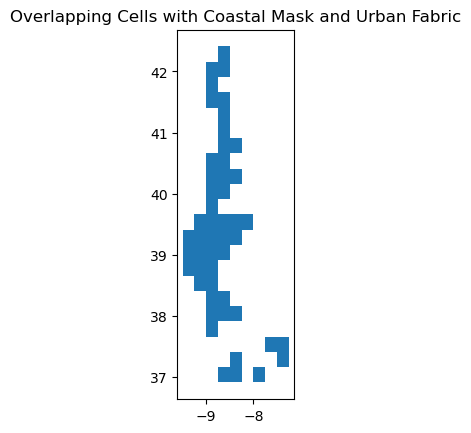

 overlapping cells found for Greece


<Figure size 1000x1000 with 0 Axes>

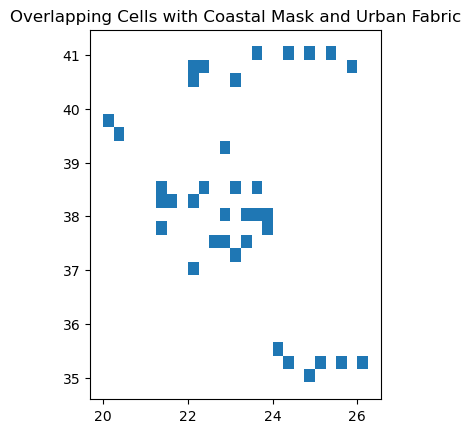

 overlapping cells found for United Kingdom


<Figure size 1000x1000 with 0 Axes>

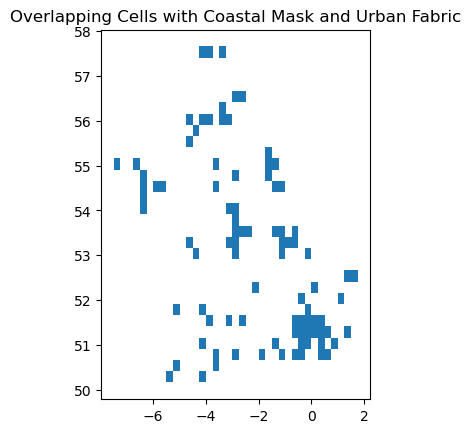

In [ ]:

# Example usage
# Assuming gdf_cisi_index_pop_overlap_cm and gdf_urban_fabric are already defined
avg_change_percentages_belgium = country_metrics(gdf_cisi_index_pop_overlap_cm_uf, gdf_belgium)
avg_change_percentages_france = country_metrics(gdf_cisi_index_pop_overlap_cm_uf, gdf_france)
avg_change_percentages_italy = country_metrics(gdf_cisi_index_pop_overlap_cm_uf, gdf_italy)
avg_change_percentages_spain = country_metrics(gdf_cisi_index_pop_overlap_cm_uf, gdf_spain)
avg_change_percentages_netherlands = country_metrics(gdf_cisi_index_pop_overlap_cm_uf, gdf_netherlands)
avg_change_percentages_denmark = country_metrics(gdf_cisi_index_pop_overlap_cm_uf, gdf_denmark)
avg_change_percentages_poland = country_metrics(gdf_cisi_index_pop_overlap_cm_uf, gdf_poland)
avg_change_percentages_croatia = country_metrics(gdf_cisi_index_pop_overlap_cm_uf, gdf_croatia)
avg_change_percentages_slovenia = country_metrics(gdf_cisi_index_pop_overlap_cm_uf, gdf_slovenia)
avg_change_percentages_latvia = country_metrics(gdf_cisi_index_pop_overlap_cm_uf, gdf_latvia)
avg_change_percentages_lithuania = country_metrics(gdf_cisi_index_pop_overlap_cm_uf, gdf_lithuania)
avg_change_percentages_estonia = country_metrics(gdf_cisi_index_pop_overlap_cm_uf, gdf_estonia)
avg_change_percentages_finland = country_metrics(gdf_cisi_index_pop_overlap_cm_uf, gdf_finland)
avg_change_percentages_sweden = country_metrics(gdf_cisi_index_pop_overlap_cm_uf, gdf_sweden)
avg_change_percentages_portugal = country_metrics(gdf_cisi_index_pop_overlap_cm_uf, gdf_portugal)
avg_change_percentages_greece = country_metrics(gdf_cisi_index_pop_overlap_cm_uf, gdf_greece)
avg_change_percentages_uk = country_metrics(gdf_cisi_index_pop_overlap_cm_uf, gdf_uk)


In [ ]:
avg_change_percentages_countries = {
    "Belgium": avg_change_percentages_belgium,
    "France": avg_change_percentages_france,
    "Italy": avg_change_percentages_italy,
    "Spain": avg_change_percentages_spain,
    "Netherlands": avg_change_percentages_netherlands,
    "Denmark": avg_change_percentages_denmark,
    "Poland": avg_change_percentages_poland,
    "Croatia": avg_change_percentages_croatia,
    "Slovenia": avg_change_percentages_slovenia,
    "Latvia": avg_change_percentages_latvia,
    "Lithuania": avg_change_percentages_lithuania,
    "Estonia": avg_change_percentages_estonia,
    "Portugal": avg_change_percentages_portugal,
    "Greece": avg_change_percentages_greece,
    "United Kingdom": avg_change_percentages_uk
}


In [ ]:
avg_change_percentages_belgium

{'avg_change_percentage_2100_SSP1': 54.321638764411084,
 'avg_change_percentage_2100_SSP2': 72.84491389562699,
 'avg_change_percentage_2100_SSP3': 91.42417283947816,
 'avg_change_percentage_2100_SSP4': 32.97733209014624,
 'avg_change_percentage_2100_SSP5': 80.40730495984377,
 'avg_change_percentage_2050_SSP1': 68.66061609409539,
 'avg_change_percentage_2050_SSP2': 68.28276088910374,
 'avg_change_percentage_2050_SSP3': 65.48117364512429,
 'avg_change_percentage_2050_SSP4': 60.30248838981219,
 'avg_change_percentage_2050_SSP5': 80.25004508629229,
 'avg_change_percentage_2030_SSP1': 60.935417945618795,
 'avg_change_percentage_2030_SSP2': 60.7356660739618,
 'avg_change_percentage_2030_SSP3': 59.54386844767689,
 'avg_change_percentage_2030_SSP4': 59.56447958439114,
 'avg_change_percentage_2030_SSP5': 64.18086119427187}

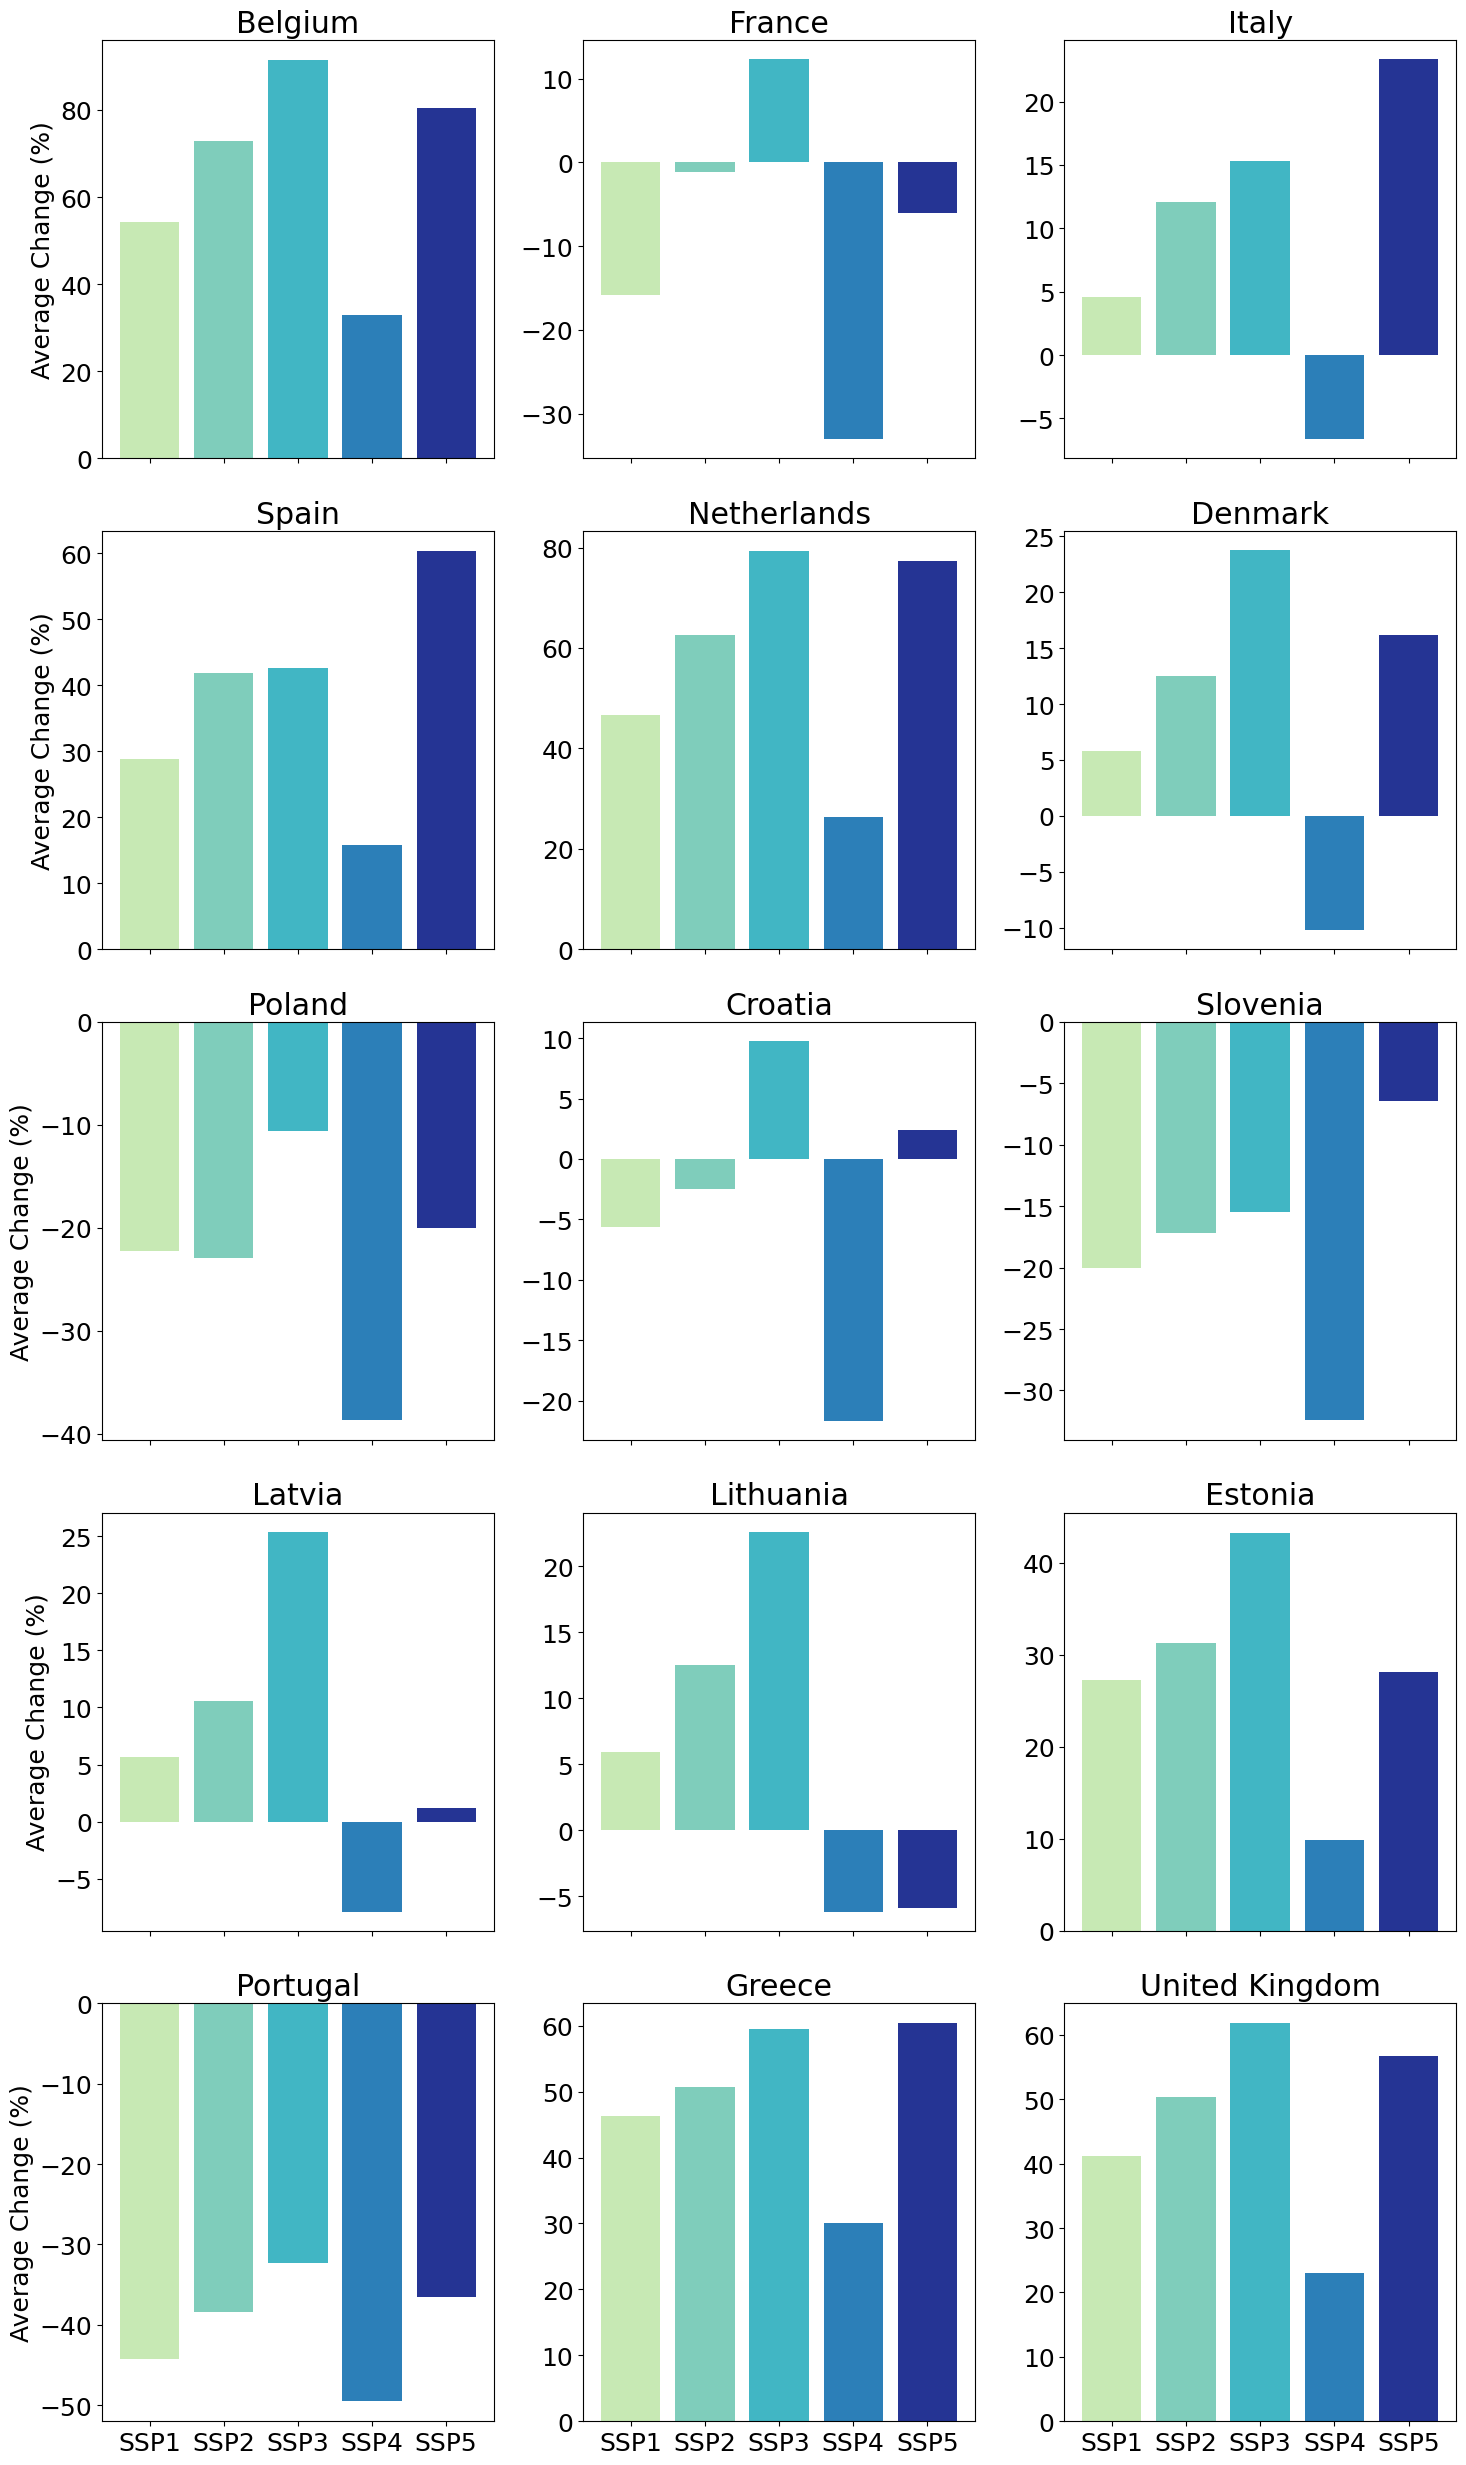

In [ ]:

# Define the SSP scenarios and the year
ssp_scenarios = ['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5']
year = 2100

# Create subplots
num_countries = len(avg_change_percentages_countries)
num_cols = 3
num_rows = int(np.ceil(num_countries / num_cols))

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axs = axs.flatten()

# Plot each country's data
for i, country in enumerate(avg_change_percentages_countries.keys()):
    country_data = avg_change_percentages_countries[country]
    ssp_values = [country_data[f'avg_change_percentage_{year}_{ssp}'] for ssp in ssp_scenarios]
    axs[i].bar(ssp_scenarios, ssp_values, color=['#c7e9b4', '#7fcdbb', '#41b6c4', '#2c7fb8', '#253494'])
    axs[i].set_title(str(country))

axs[0].set_ylabel('Average Change (%)')
axs[3].set_ylabel('Average Change (%)')
axs[6].set_ylabel('Average Change (%)')
axs[9].set_ylabel('Average Change (%)')
axs[12].set_ylabel('Average Change (%)')

#remove ticks labels 0, 1, 2, 3, 4, 6, 7, 8
for i in range(0, 12):
    axs[i].set_xticklabels([])


# # Hide any unused subplots
# for j in range(i + 1, len(axs)):
#     fig.delaxes(axs[j])

# text size 
plt.rcParams.update({'font.size': 18})

plt.tight_layout()
plt.show()

# Export the GeoDataFrame to a GeoJSON file

In [ ]:
cisi_index_pop.columns

Index(['CISI', 'Subscore_energy', 'Subscore_transportation', 'Subscore_water',
       'Subscore_waste', 'Subscore_telecommunication', 'Subscore_healthcare',
       'Subscore_education', 'geometry', 'total_pop_2010_SSP2_merkens',
       'total_pop_2010_SSP1', 'total_pop_2030_SSP1', 'total_pop_2030_SSP2',
       'total_pop_2030_SSP3', 'total_pop_2030_SSP4', 'total_pop_2030_SSP5',
       'total_pop_2050_SSP1', 'total_pop_2050_SSP2', 'total_pop_2050_SSP3',
       'total_pop_2050_SSP4', 'total_pop_2050_SSP5', 'total_pop_2100_SSP1',
       'total_pop_2100_SSP2', 'total_pop_2100_SSP3', 'total_pop_2100_SSP4',
       'total_pop_2100_SSP5', 'quantile_cisi',
       'total_pop_2100_SSP1_CISI_predictions',
       'total_pop_2100_SSP2_CISI_predictions',
       'total_pop_2100_SSP3_CISI_predictions',
       'total_pop_2100_SSP4_CISI_predictions',
       'total_pop_2100_SSP5_CISI_predictions',
       'total_pop_2030_SSP1_CISI_predictions',
       'total_pop_2030_SSP2_CISI_predictions',
       'total_p

In [ ]:
# draop list of columns
drop_cols = ['total_pop_2010_SSP2_merkens',
       'quantile_cisi',
       'total_pop_2030_SSP1_CISI_predictions_CISI_predictions',
       'total_pop_2030_SSP2_CISI_predictions_CISI_predictions',
       'total_pop_2030_SSP3_CISI_predictions_CISI_predictions',
       'total_pop_2030_SSP4_CISI_predictions_CISI_predictions',
       'total_pop_2030_SSP5_CISI_predictions_CISI_predictions',
       'total_pop_2050_SSP1_CISI_predictions_CISI_predictions',
       'total_pop_2050_SSP2_CISI_predictions_CISI_predictions',
       'total_pop_2050_SSP3_CISI_predictions_CISI_predictions',
       'total_pop_2050_SSP4_CISI_predictions_CISI_predictions',
       'total_pop_2050_SSP5_CISI_predictions_CISI_predictions'
        ]
cisi_index_pop = cisi_index_pop.drop(columns=drop_cols)

In [ ]:
# Define the path to the output GeoPackage file
output_gpkg_path = "FUTUREcisi.gpkg"

# Save the GeoDataFrame to a GeoPackage with metadata and CRS
cisi_index_pop.to_file(output_gpkg_path, driver="GPKG", layer="FutureCisi_index")

# Optionally, you can add metadata to the GeoPackage
metadata = {
    "title": "FUTUREcisi: Critical Infrastructure Spatial Index projections",
    "description": "This dataset contains the CISI index projections for all SSP scenarios.",
    "crs": cisi_index_pop.crs.to_string()
}

# Save metadata to a separate file (e.g., JSON)
import json
metadata_path = "output_metadata.json"
with open(metadata_path, "w") as f:
    json.dump(metadata, f, indent=4)

print(f"GeoDataFrame saved to {output_gpkg_path} with metadata saved to {metadata_path}")

GeoDataFrame saved to FUTUREcisi.gpkg with metadata saved to output_metadata.json
